In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Training 1: updating test set
local_pred_filepath = '../../models/local_models/2022-11-18_0h9m46s/2022-11-18_0h9m46s_predictions.json'
fed_pred_filepath = '../../models/federated_models/2022-11-18_0h11m1s/2022-11-18_0h11m1s_predictions.json'

In [3]:
with open(local_pred_filepath) as json_file:
    df_pred_local = pd.DataFrame(json.load(json_file))
df_pred_local.head()

y_pred  \
0  [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
1  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...   
2  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3  [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...   
4  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   

                                              y_true  round_number  \
0  [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             1   
1  [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             1   
2  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             1   
3  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             1   
4  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             1   

   site_number  
0            1  
1            2  
2            3  
3            4  
4            5

In [4]:
with open(fed_pred_filepath) as json_file:
    df_pred_fed = pd.DataFrame(json.load(json_file))
df_pred_fed.head()

y_pred  \
0  [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2  [1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...   
3  [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
4  [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   

                                              y_true  round_number  \
0  [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             1   
1  [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             1   
2  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             1   
3  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             1   
4  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             1   

   site_number  
0            1  
1            2  
2            3  
3            4  
4            5

In [5]:
def get_extra_metrics(df):
    all_metrics = []
    for y_pred, y_true in zip(df['y_pred'], df['y_true']):
        metrics = {'accuracy_score': accuracy_score(y_true, y_pred),
                   'balanced_accuracy_score': balanced_accuracy_score(y_true, y_pred),
                   'recall_score': recall_score(y_true, y_pred),
                   'precision_score': precision_score(y_true, y_pred),
                   'f1_score': f1_score(y_true, y_pred),
                   'roc_auc_score': roc_auc_score(y_true, y_pred),
                   }
        all_metrics.append(metrics)
    return pd.concat([df, pd.DataFrame(all_metrics)], axis=1)

df_metrics_local = get_extra_metrics(df_pred_local)
df_metrics_local

y_pred  \
0   [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
1   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...   
2   [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
3   [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...   
4   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
5   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
6   [0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...   
7   [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
8   [1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, ...   
9   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
10  [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
11  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   
12  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
13  [1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
14  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...   
15  [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
16  [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...   
17  [0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...   
18  [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
19  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...   
20  [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
21  [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
22  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
23  [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
24  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, ...   

                                               y_true  round_number  \
0   [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             1   
1   [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             1   
2   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             1   
3   [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             1   
4   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             1   
5   [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             2   
6   [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             2   
7   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             2   
8   [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             2   
9   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             2   
10  [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             3   
11  [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             3   
12  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             3   
13  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             3   
14  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             3   
15  [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             4   
16  [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             4   
17  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             4   
18  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             4   
19  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             4   
20  [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             5   
21  [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             5   
22  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             5   
23  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             5   
24  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             5   

    site_number  accuracy_score  balanced_accuracy_score  recall_score  \
0             1        0.670423                 0.665686      0.615983   
1             2        0.668993                 0.660492      0.524186   
2             3        0.680080                 0.678493      0.653920   
3             4        0.648893                 0.642847      0.530951   
4             5        0.677871                 0.675287      0.631646   
5             1        0.669718                 0.662288      0.584328   
6             2        0.668120                 0.665077      0.616279   
7             3        0.668232                 0.664143      0.600860   
8             4        0.647465                 0.6

In [6]:
df_metrics_fed = get_extra_metrics(df_pred_fed)
df_metrics_fed

y_pred  \
0   [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
1   [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
2   [1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...   
3   [0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
4   [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
5   [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
6   [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   
7   [1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...   
8   [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
9   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
10  [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
11  [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   
12  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...   
13  [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
14  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
15  [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
16  [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   
17  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
18  [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, ...   
19  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   
20  [1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...   
21  [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...   
22  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
23  [0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...   
24  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...   

                                               y_true  round_number  \
0   [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             1   
1   [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             1   
2   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             1   
3   [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             1   
4   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             1   
5   [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             2   
6   [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             2   
7   [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             2   
8   [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             2   
9   [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             2   
10  [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             3   
11  [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             3   
12  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             3   
13  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             3   
14  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             3   
15  [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             4   
16  [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             4   
17  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             4   
18  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             4   
19  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             4   
20  [1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, ...             5   
21  [1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...             5   
22  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...             5   
23  [0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, ...             5   
24  [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...             5   

    site_number  accuracy_score  balanced_accuracy_score  recall_score  \
0             1        0.678638                 0.666504      0.539180   
1             2        0.674008                 0.665923      0.536279   
2             3        0.673821                 0.667072      0.562620   
3             4        0.683885                 0.677180      0.553095   
4             5        0.680272                 0.673748      0.563590   
5             1        0.694131                 0.691441      0.663207   
6             2        0.695377                 0.693246      0.659070   
7             3        0.686564                 0.686410      0.684034   
8             4        0.696501                 0.6

In [8]:
metrics_list = ['accuracy_score', 'balanced_accuracy_score', 'recall_score', 'precision_score', 'f1_score', 'roc_auc_score']

In [10]:
df_diffs = df_metrics_fed[metrics_list] - df_metrics_local[metrics_list]
df_diffs

accuracy_score  balanced_accuracy_score  recall_score  precision_score  \
0         0.008216                 0.000818     -0.076803         0.042278   
1         0.005015                 0.005431      0.012093         0.003543   
2        -0.006260                -0.011421     -0.091300         0.024628   
3         0.034992                 0.034333      0.022144         0.053900   
4         0.002401                -0.001538     -0.068056         0.032253   
5         0.024413                 0.029152      0.078879         0.011375   
6         0.027257                 0.028169      0.042791         0.025631   
7         0.018332                 0.022267      0.083174        -0.000657   
8         0.049036                 0.054159      0.148968         0.020377   
9         0.024010                 0.027543      0.087197         0.003955   
10        0.028404                 0.025390     -0.006227         0.046316   
11        0.037724                 0.035018     -0.008372         0.061188   
12        0.024816                 0.023106     -0.003346         0.037569   
13        0.042847                 0.043437      0.054353         0.047608   
14        0.038215                 0.039242      0.056572         0.038066   
15        0.030986                 0.032263      0.045667         0.035281   
16        0.047536                 0.044418     -0.005581         0.076589   
17        0.038229                 0.028773     -0.117591         0.084467   
18        0.052130                 0.052322      0.055863         0.064243   
19        0.046619                 0.046414      0.042960         0.055981   
20        0.033803                 0.042873      0.138038         0.003891   
21        0.065198                 0.066204      0.082326         0.065372   
22        0.045831                 0.050824      0.128107         0.024200   
23        0.042133                 0.045159      0.101158         0.026387   
24        0.048219                 0.051136      0.100383         0.034787   

    f1_score  roc_auc_score  
0  -0.025532       0.000818  
1   0.009121       0.005431  
2  -0.039226      -0.011421  
3   0.034806       0.034333  
4  -0.024649      -0.001538  
5   0.046879       0.029152  
6   0.034631       0.028169  
7   0.042386       0.022267  
8   0.094642       0.054159  
9   0.047238       0.027543  
10  0.018327       0.025390  
11  0.023891       0.035018  
12  0.016591       0.023106  
13  0.051586       0.043437  
14  0.048177       0.039242  
15  0.041525       0.032263  
16  0.031857       0.044418  
17 -0.011577       0.028773  
18  0.059766       0.052322  
19  0.049044       0.046414  
20  0.075263       0.042873  
21  0.073817       0.066204  
22  0.076687       0.050824  
23  0.066037       0.045159  
24  0.066894       0.051136

In [22]:
print(df_diffs.mean()*100)

accuracy_score             3.240405
balanced_accuracy_score    3.261962
recall_score               3.613582
precision_score            3.676915
f1_score                   3.632732
roc_auc_score              3.261962
dtype: float64


In [23]:
for site_number in df_metrics_fed['site_number'].unique():
    df_metrics_fed_tmp = df_metrics_fed[df_metrics_fed['site_number'] == site_number]
    df_metrics_local_tmp = df_metrics_local[df_metrics_local['site_number'] == site_number]
    df_diffs_ = df_metrics_fed_tmp[metrics_list] - df_metrics_local_tmp[metrics_list]
    
    print(f'\nsite_number: {site_number}')
    print(df_diffs_.mean()*100)


site_number: 1
accuracy_score             2.516432
balanced_accuracy_score    2.609939
recall_score               3.591074
precision_score            2.782817
f1_score                   3.129245
roc_auc_score              2.609939
dtype: float64

site_number: 2
accuracy_score             3.654601
balanced_accuracy_score    3.584775
recall_score               2.465116
precision_score            4.646471
f1_score                   3.466357
roc_auc_score              3.584775
dtype: float64

site_number: 3
accuracy_score             2.418958
balanced_accuracy_score    2.270994
recall_score              -0.019120
precision_score            3.404160
f1_score                   1.697229
roc_auc_score              2.270994
dtype: float64

site_number: 4
accuracy_score             4.422756
balanced_accuracy_score    4.588186
recall_score               7.649723
precision_score            4.250295
f1_score                   6.136751
roc_auc_score              4.588186
dtype: float64

site_number

In [7]:
def plot_metric_by_site(df_metrics_local, df_metrics_fed, 
                        eval_metric='accuracy_score', x_metric='round_number', split_by='site_number',
                        title='site number:', figsize=None):

    n_plots = len(df_metrics_local[split_by].unique())
    if not figsize:
        figsize = (10, 3*n_plots)
    plt.figure(figsize=figsize)
    for split_val in df_metrics_local[split_by].unique():
        plt.subplot(n_plots, 1, split_val)
        plt.title(f'{title} {split_val}')

        df_tmp_local = df_metrics_local[df_metrics_local[split_by] == split_val]
        df_tmp_fed = df_metrics_fed[df_metrics_fed[split_by] == split_val]

        plt.plot(df_tmp_local[x_metric], df_tmp_local[eval_metric], marker='s', alpha=0.75, label=f'local')
        plt.plot(df_tmp_fed[x_metric], df_tmp_fed[eval_metric], marker='s', alpha=0.75, label=f'federated')
        plt.legend()
        plt.ylabel(eval_metric)
        plt.xticks([i+1 for i in range(n_plots)], df_metrics_local[split_by].unique())
    plt.xlabel(x_metric)
    plt.tight_layout()
    plt.show()


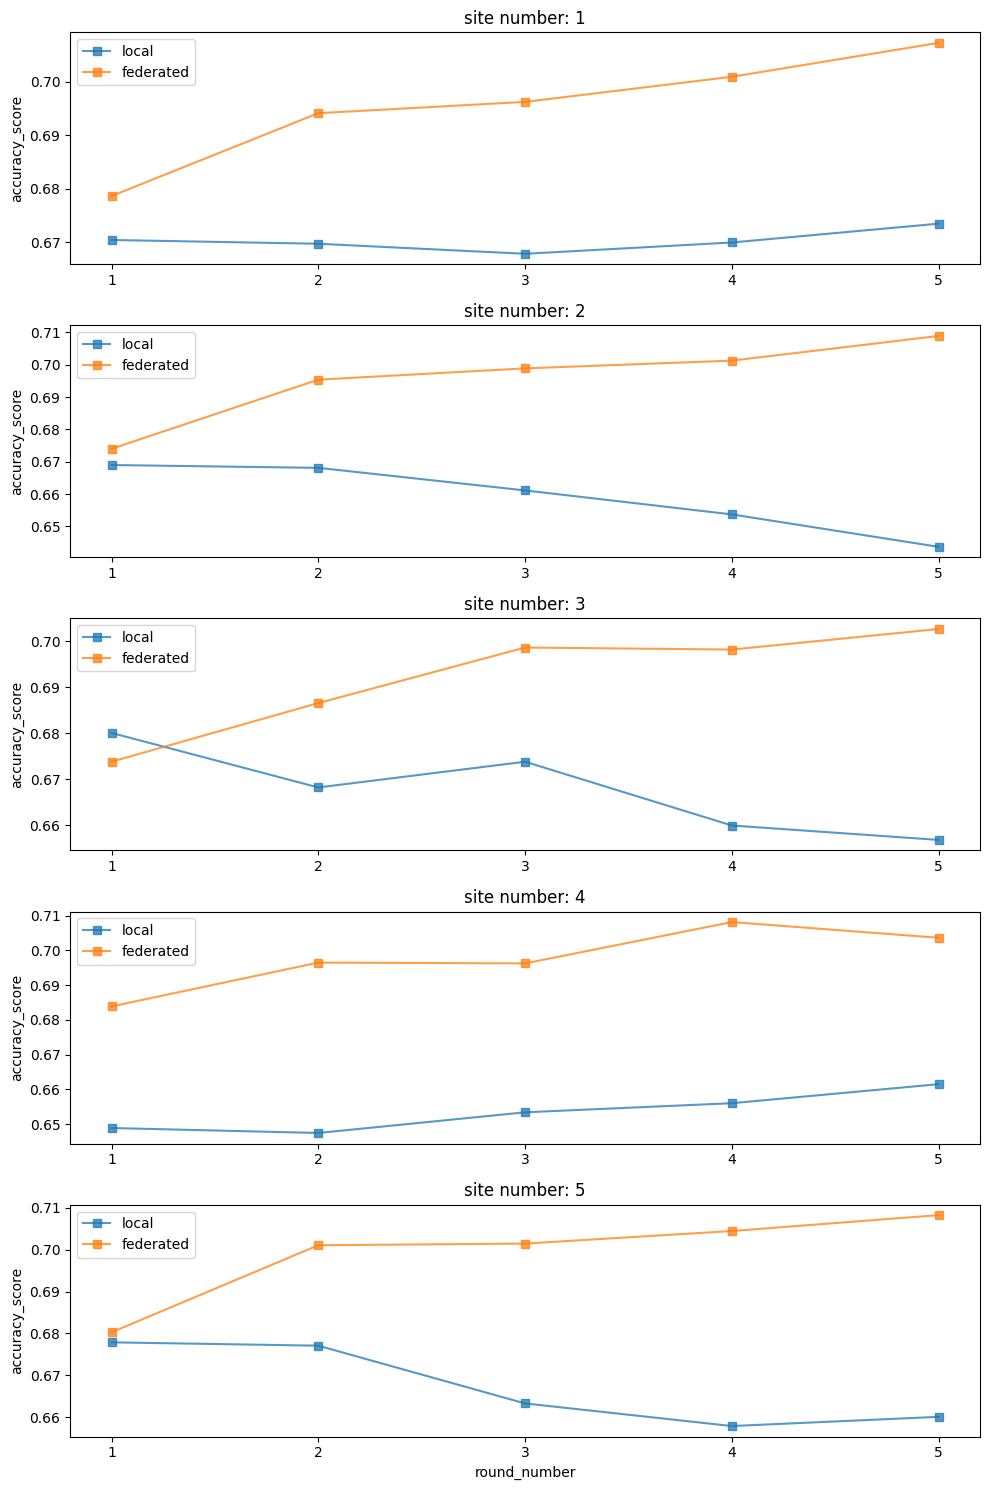

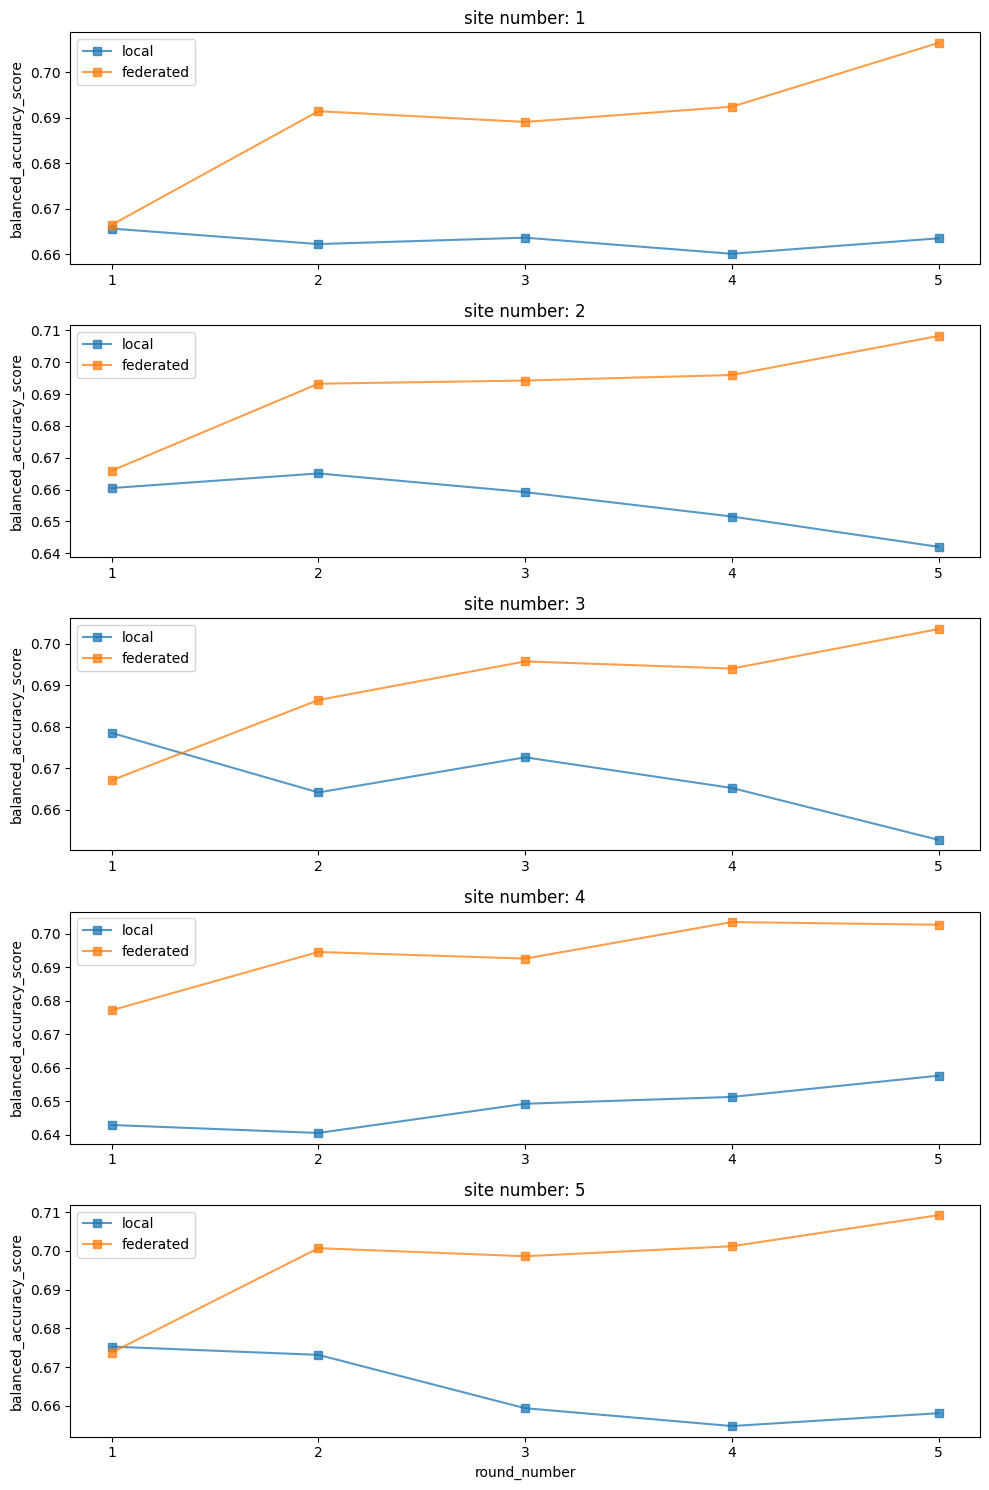

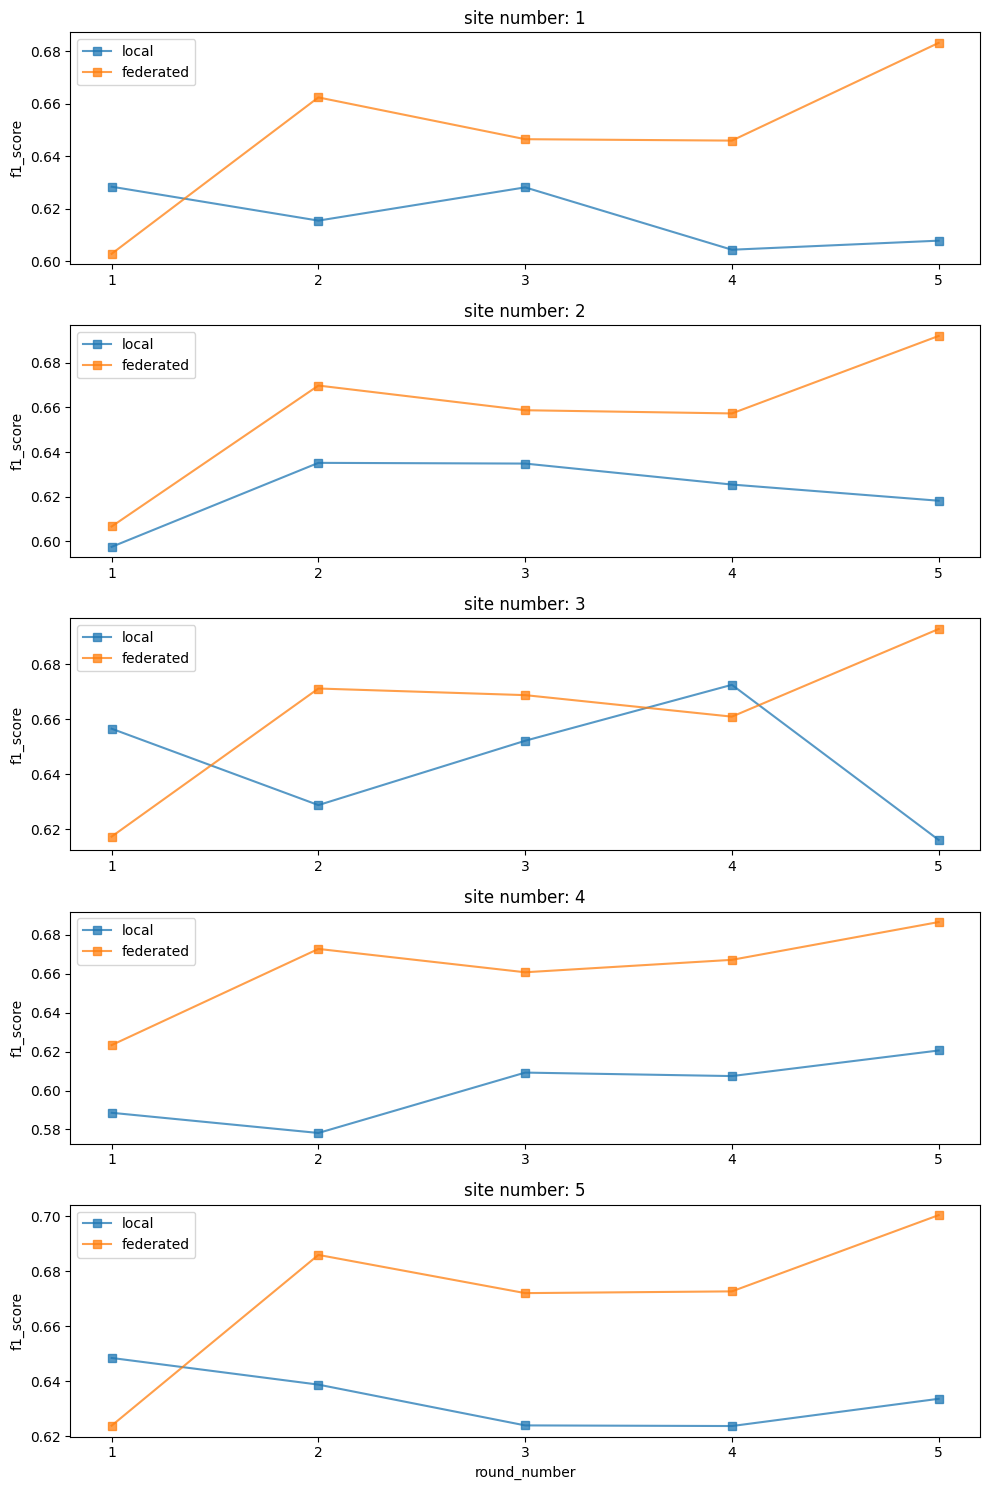

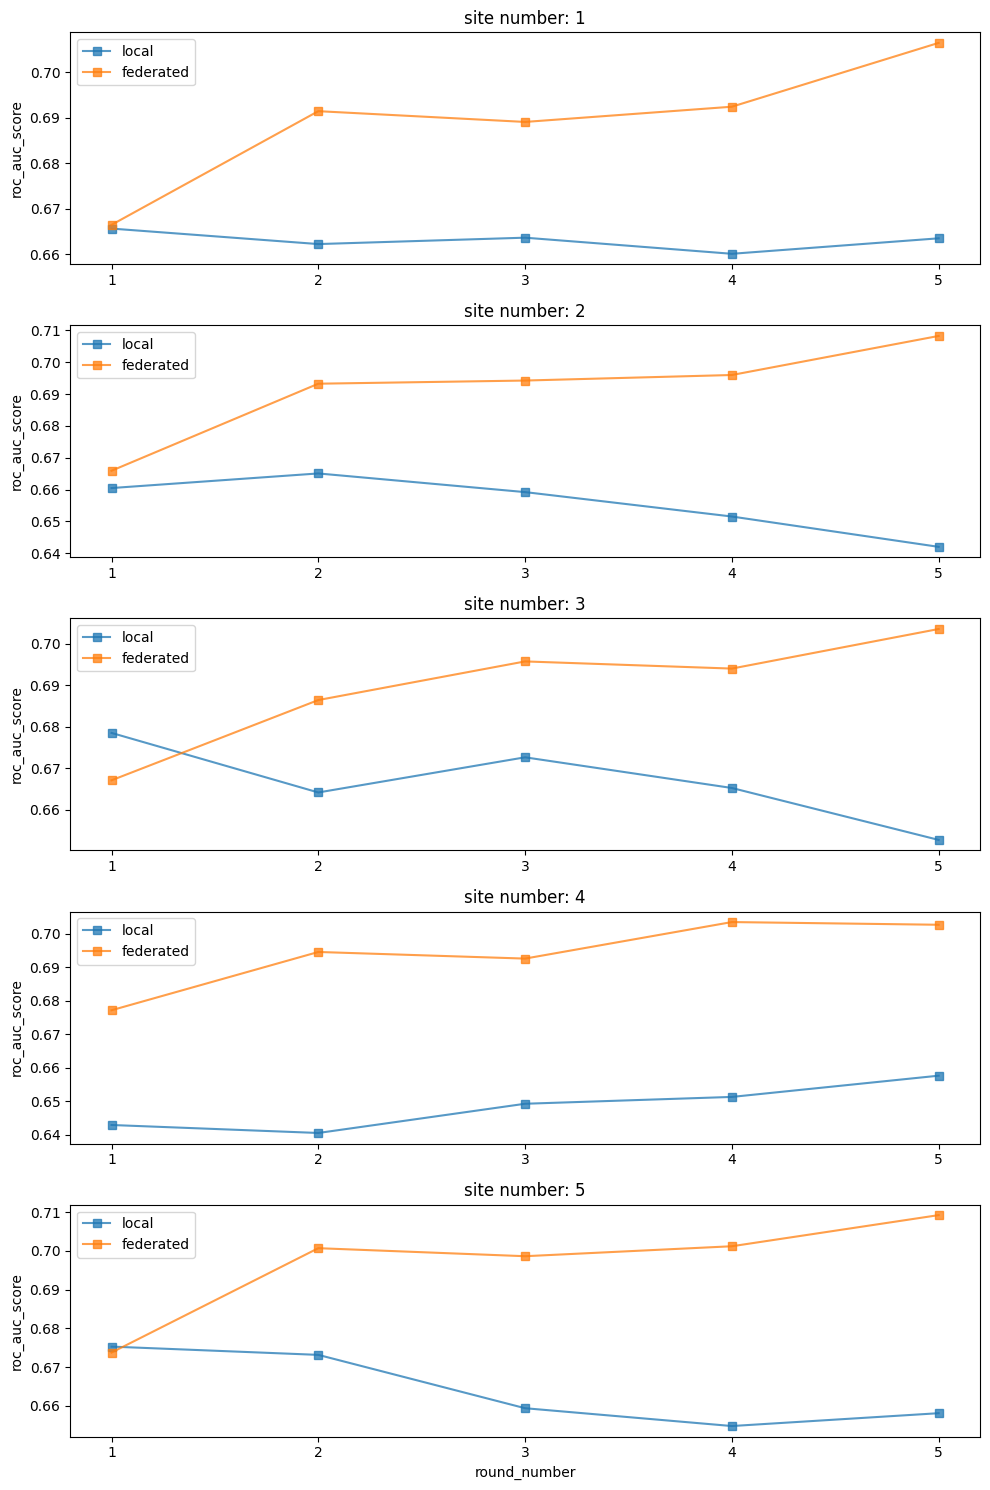

In [8]:
for metric in ['accuracy_score', 'balanced_accuracy_score', 'f1_score', 'roc_auc_score']:
    plot_metric_by_site(df_metrics_local, df_metrics_fed, eval_metric=metric)

In [9]:
def plot_confusion_matrices(df_local, df_fed, round_number=1, normalize=None,
                            cmap='Blues', figsize=None):
    
    df_local_tmp = df_local[df_local['round_number'] == round_number]
    df_fed_tmp = df_fed[df_fed['round_number'] == round_number]

    n_sites = df_local_tmp['site_number'].unique().shape[0]
    if not figsize:
        figsize = (10, 4*n_sites)
    plt.figure(figsize=figsize)
    for i, site_number in enumerate(df_local_tmp['site_number'].unique()):
        
        y_true_local = df_local_tmp[df_local_tmp['site_number'] == site_number]['y_true'].values[0]
        y_pred_local = df_local_tmp[df_local_tmp['site_number'] == site_number]['y_pred'].values[0]
        cm_local = confusion_matrix(y_true_local, y_pred_local, normalize=normalize)
        y_true_fed = df_fed_tmp[df_fed_tmp['site_number'] == site_number]['y_true'].values[0]
        y_pred_fed = df_fed_tmp[df_fed_tmp['site_number'] == site_number]['y_pred'].values[0]
        cm_fed = confusion_matrix(y_true_fed, y_pred_fed, normalize=normalize)
        
        vmin = min([0, cm_local.min(), cm_fed.min()])
        vmax = max([cm_local.max(), cm_fed.max()])
        
        plt.subplot(n_sites, 2, (i*2+1))
        plt.title(f'Local model (site nº: {site_number} round nº: {round_number})')
        sns.heatmap(cm_local, annot=np.round(cm_local, 2), cmap=cmap, vmin=vmin, vmax=vmax)
        plt.subplot(n_sites, 2, (i*2+2))
        plt.title(f'Federated model (site nº: {site_number} round nº: {round_number})')
        sns.heatmap(cm_fed, annot=np.round(cm_fed, 2), cmap=cmap, vmin=vmin, vmax=vmax)

    plt.tight_layout()
    plt.show()


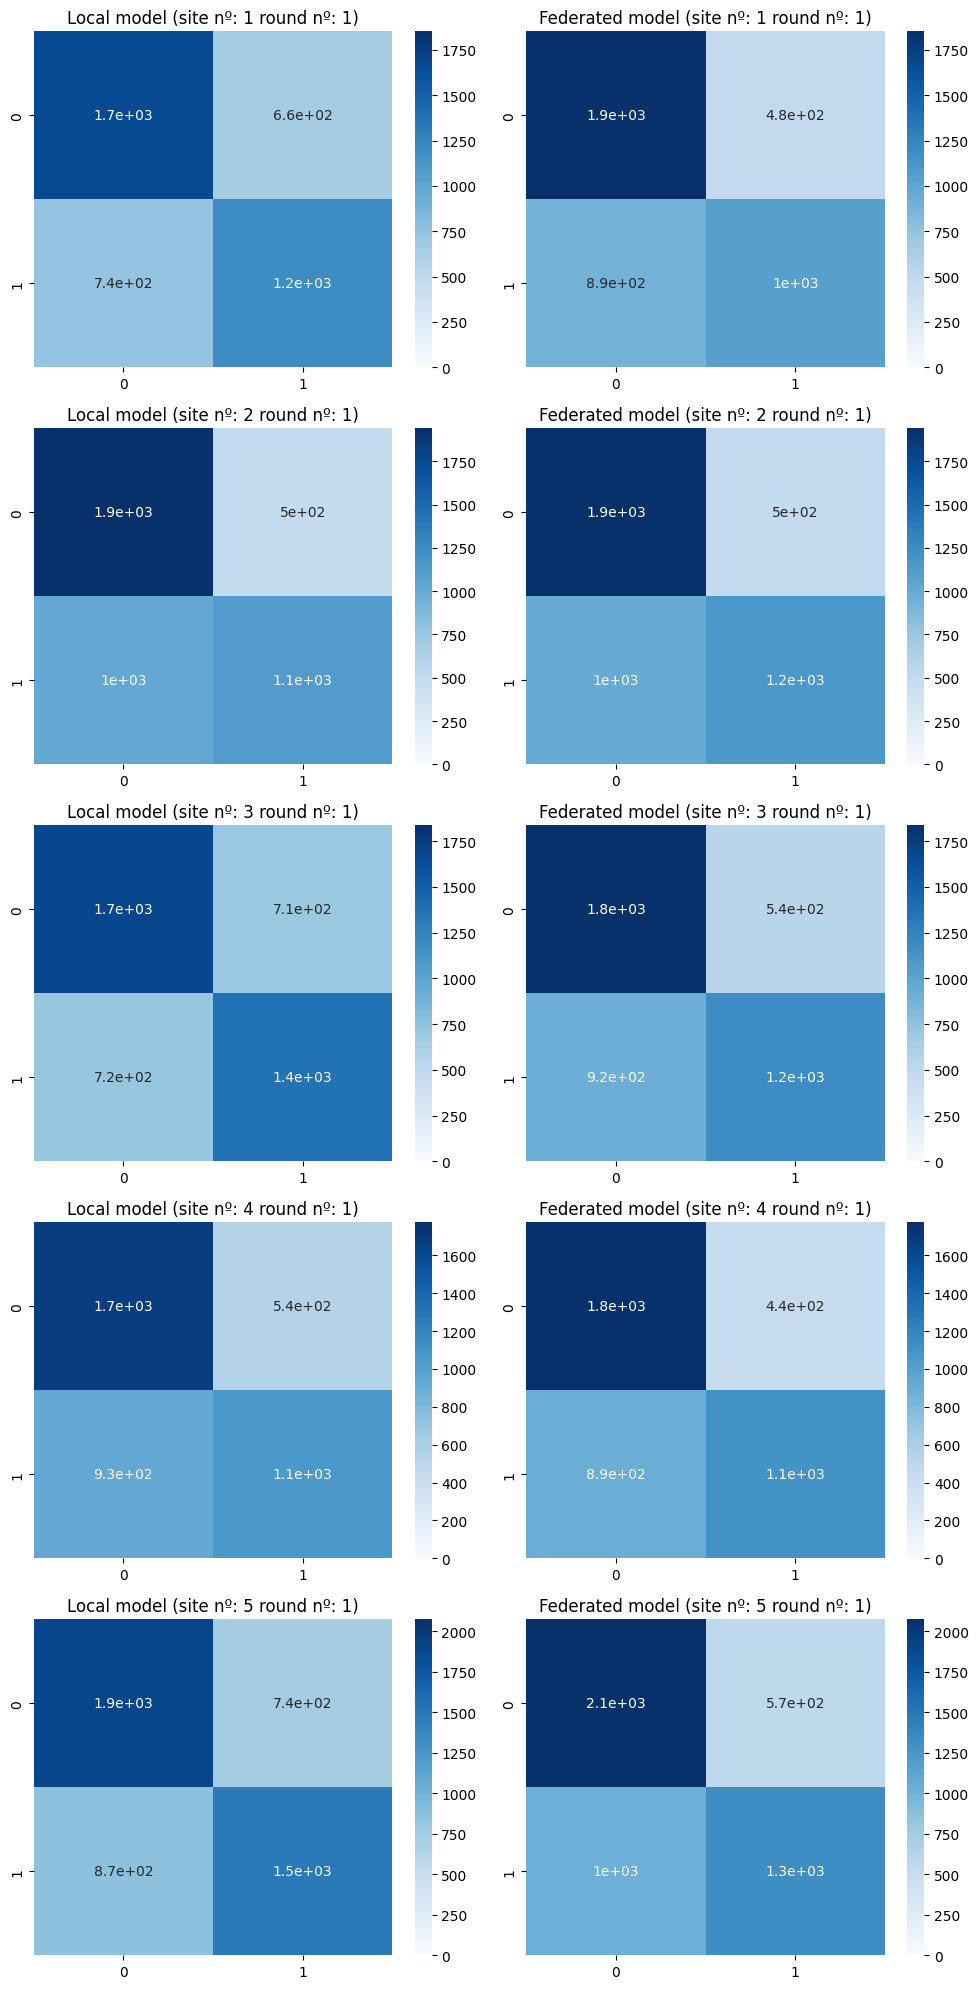

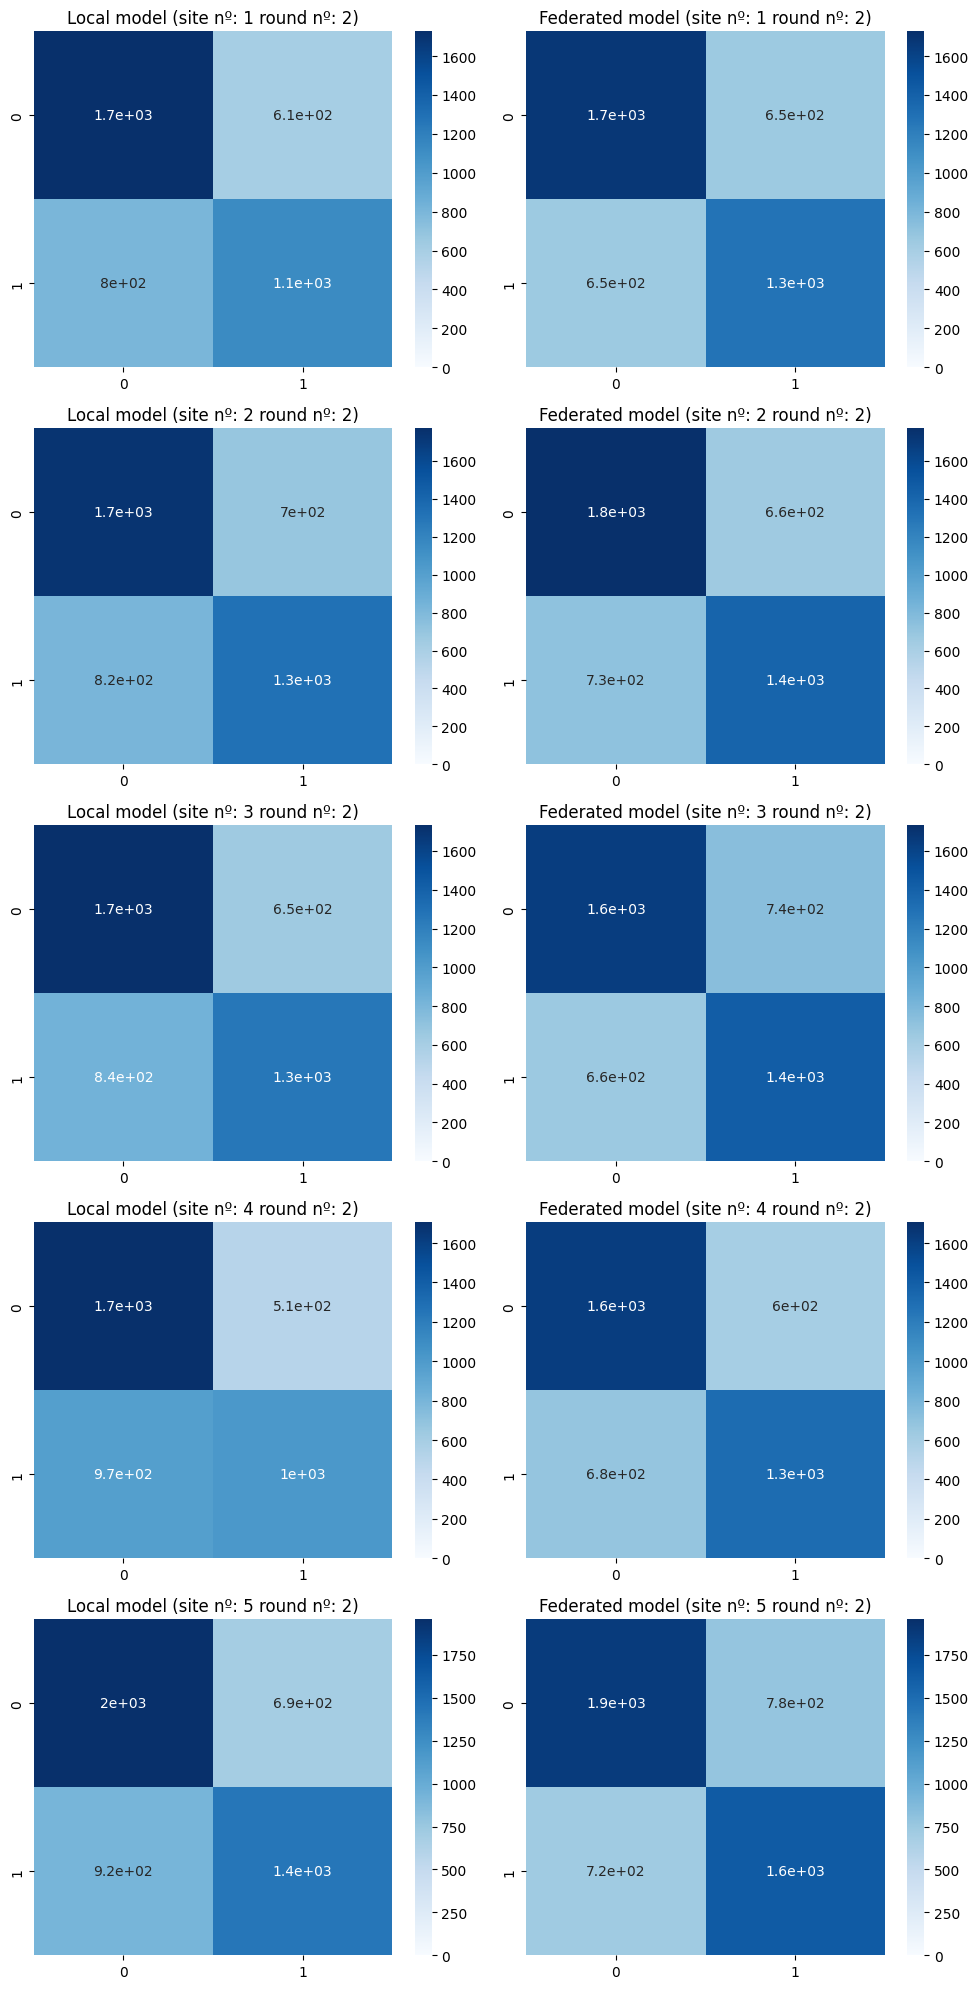

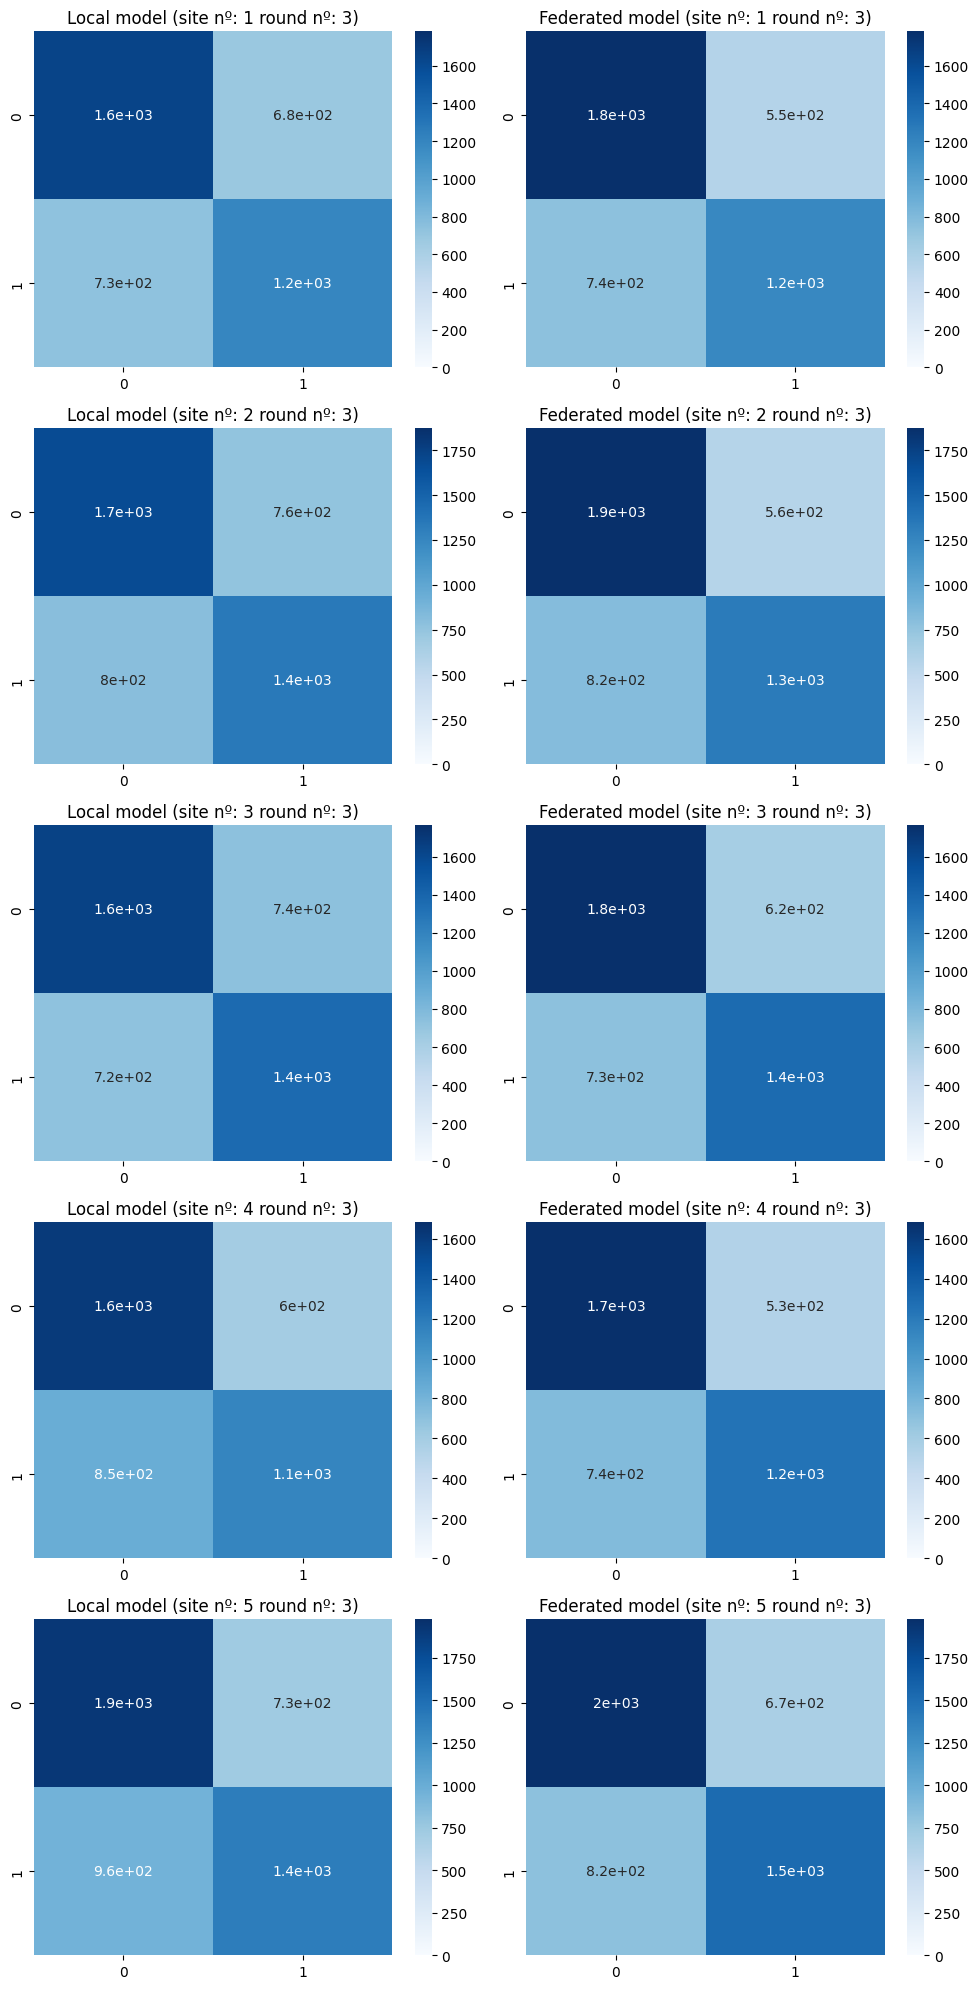

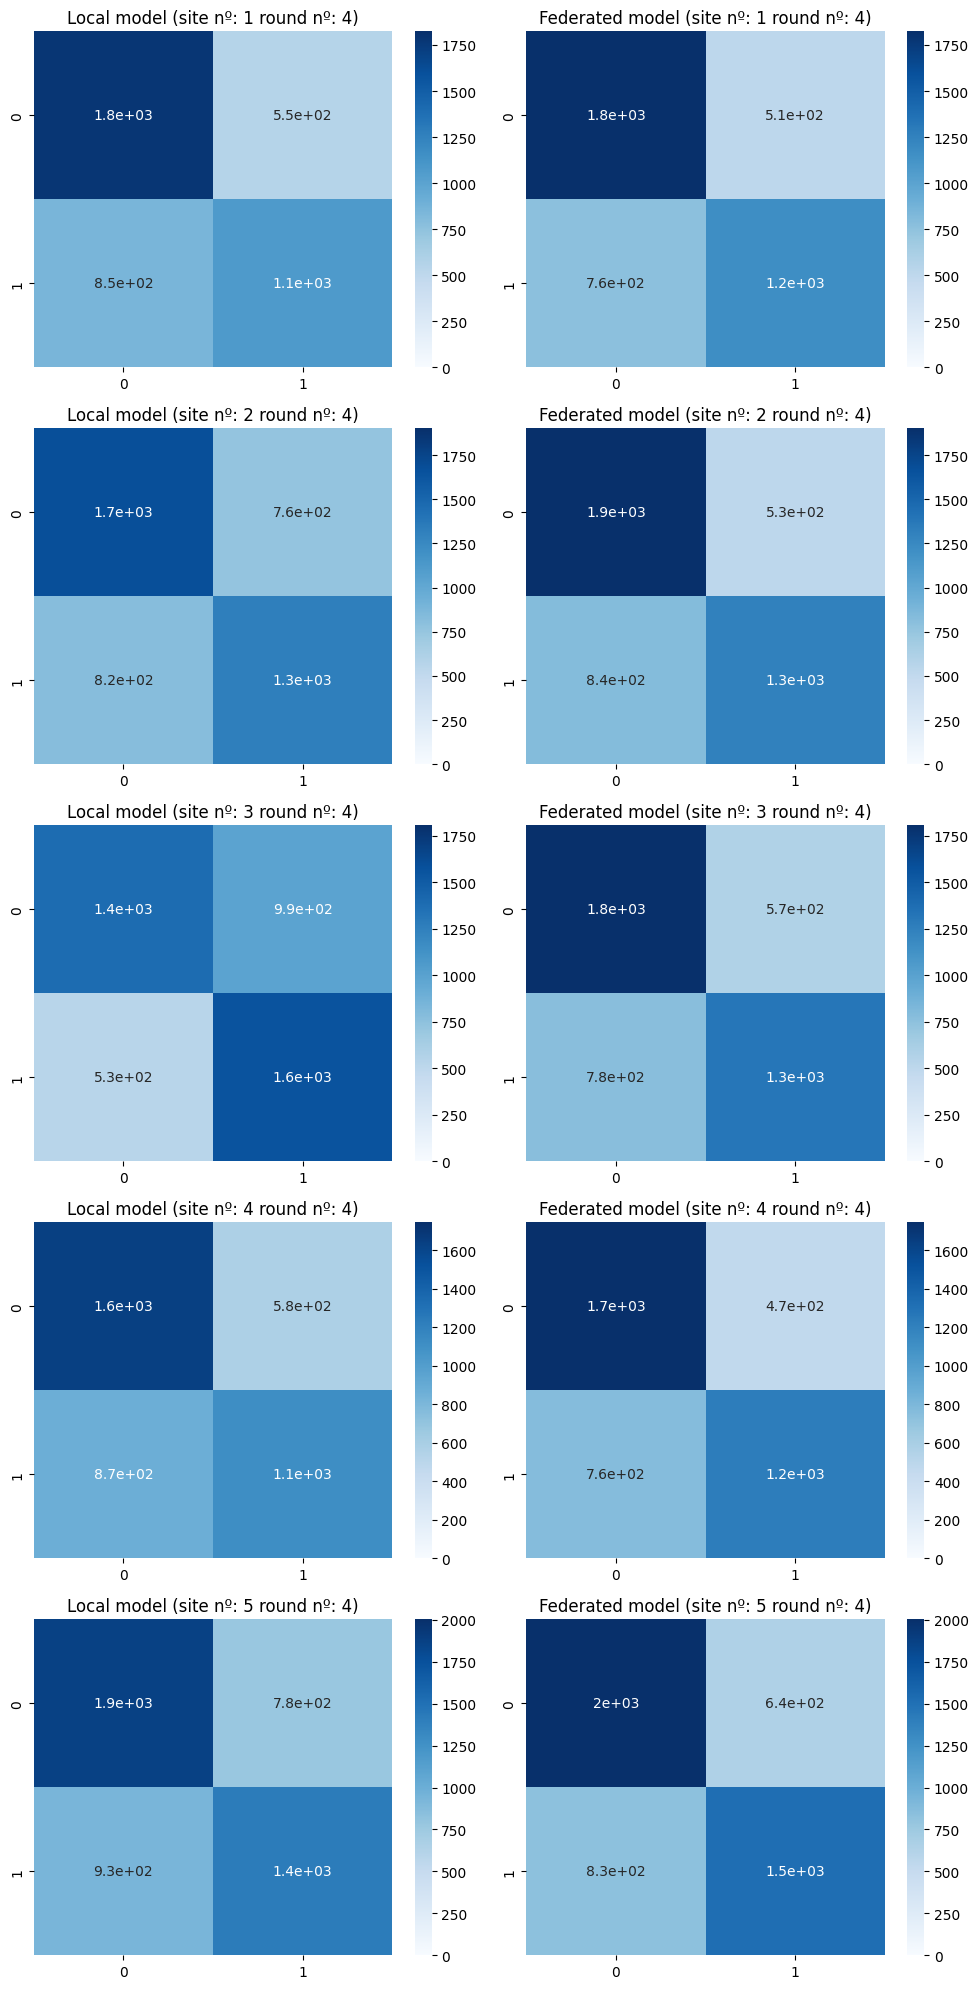

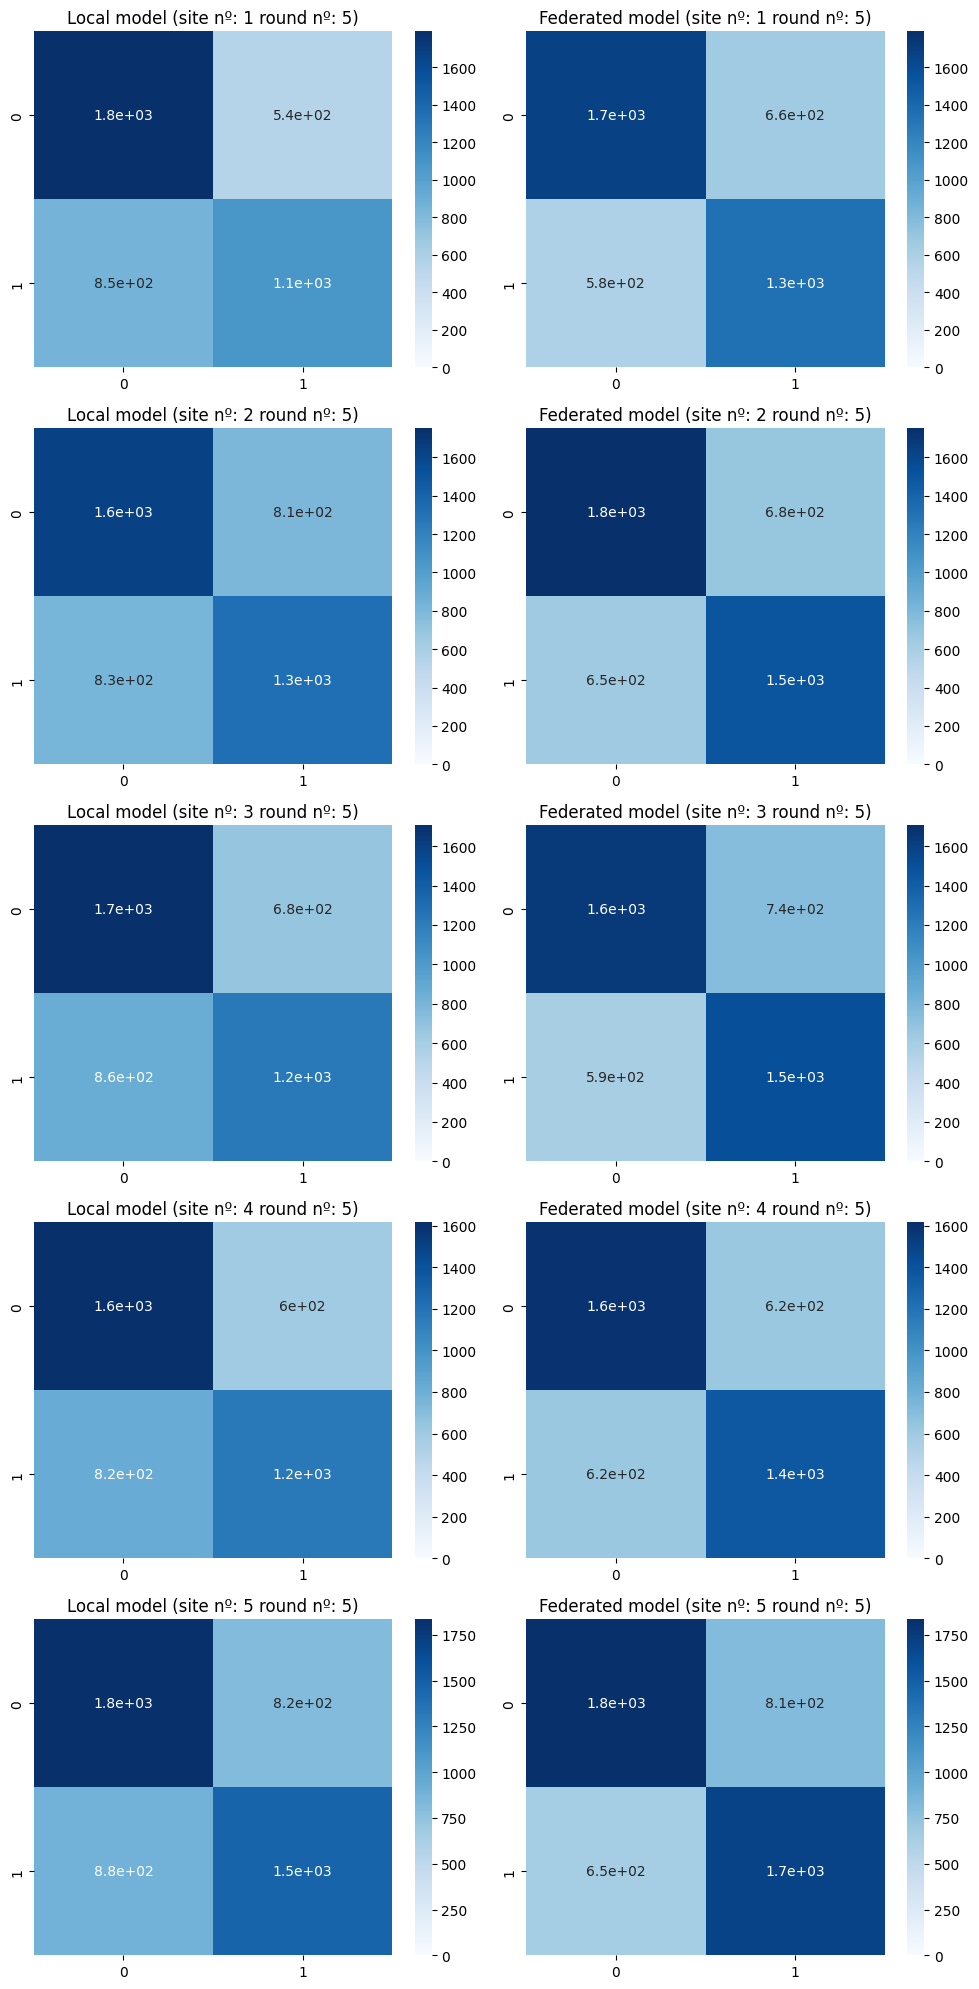

In [10]:
for n in df_metrics_local['round_number'].unique():
    plot_confusion_matrices(df_metrics_local, df_metrics_fed, round_number=n)

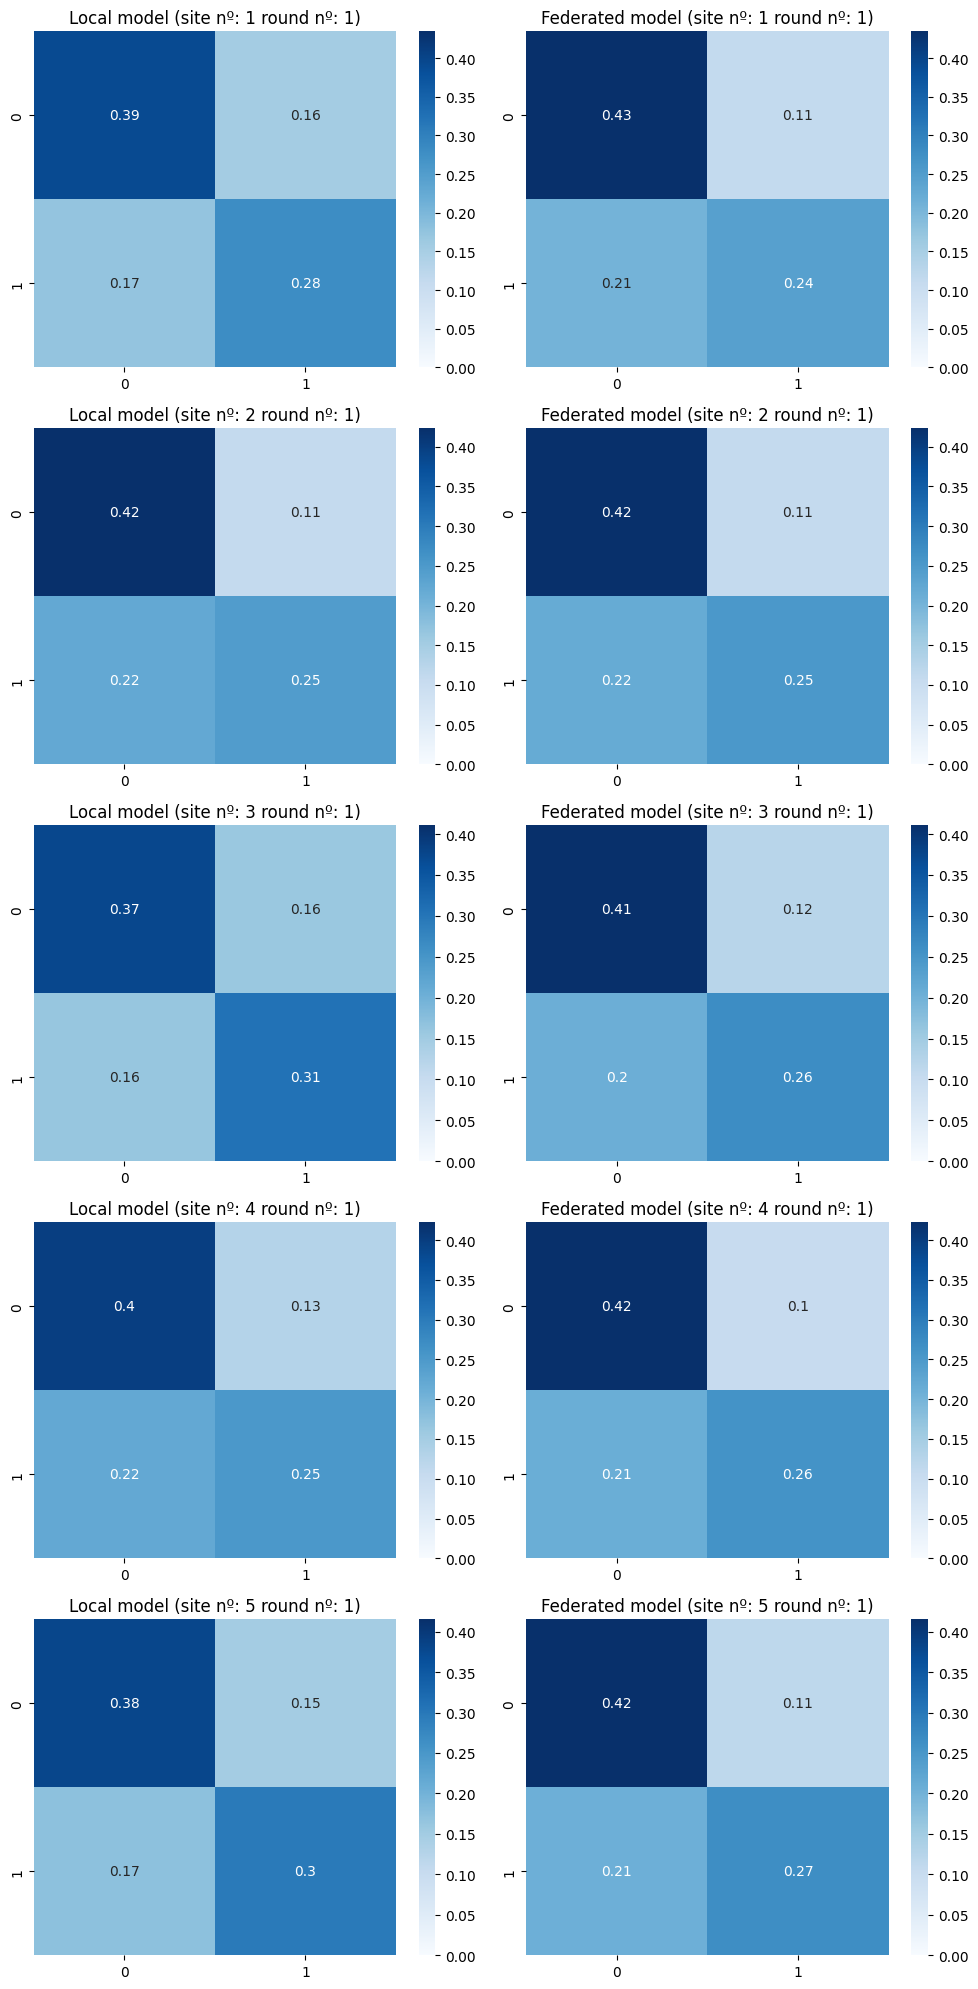

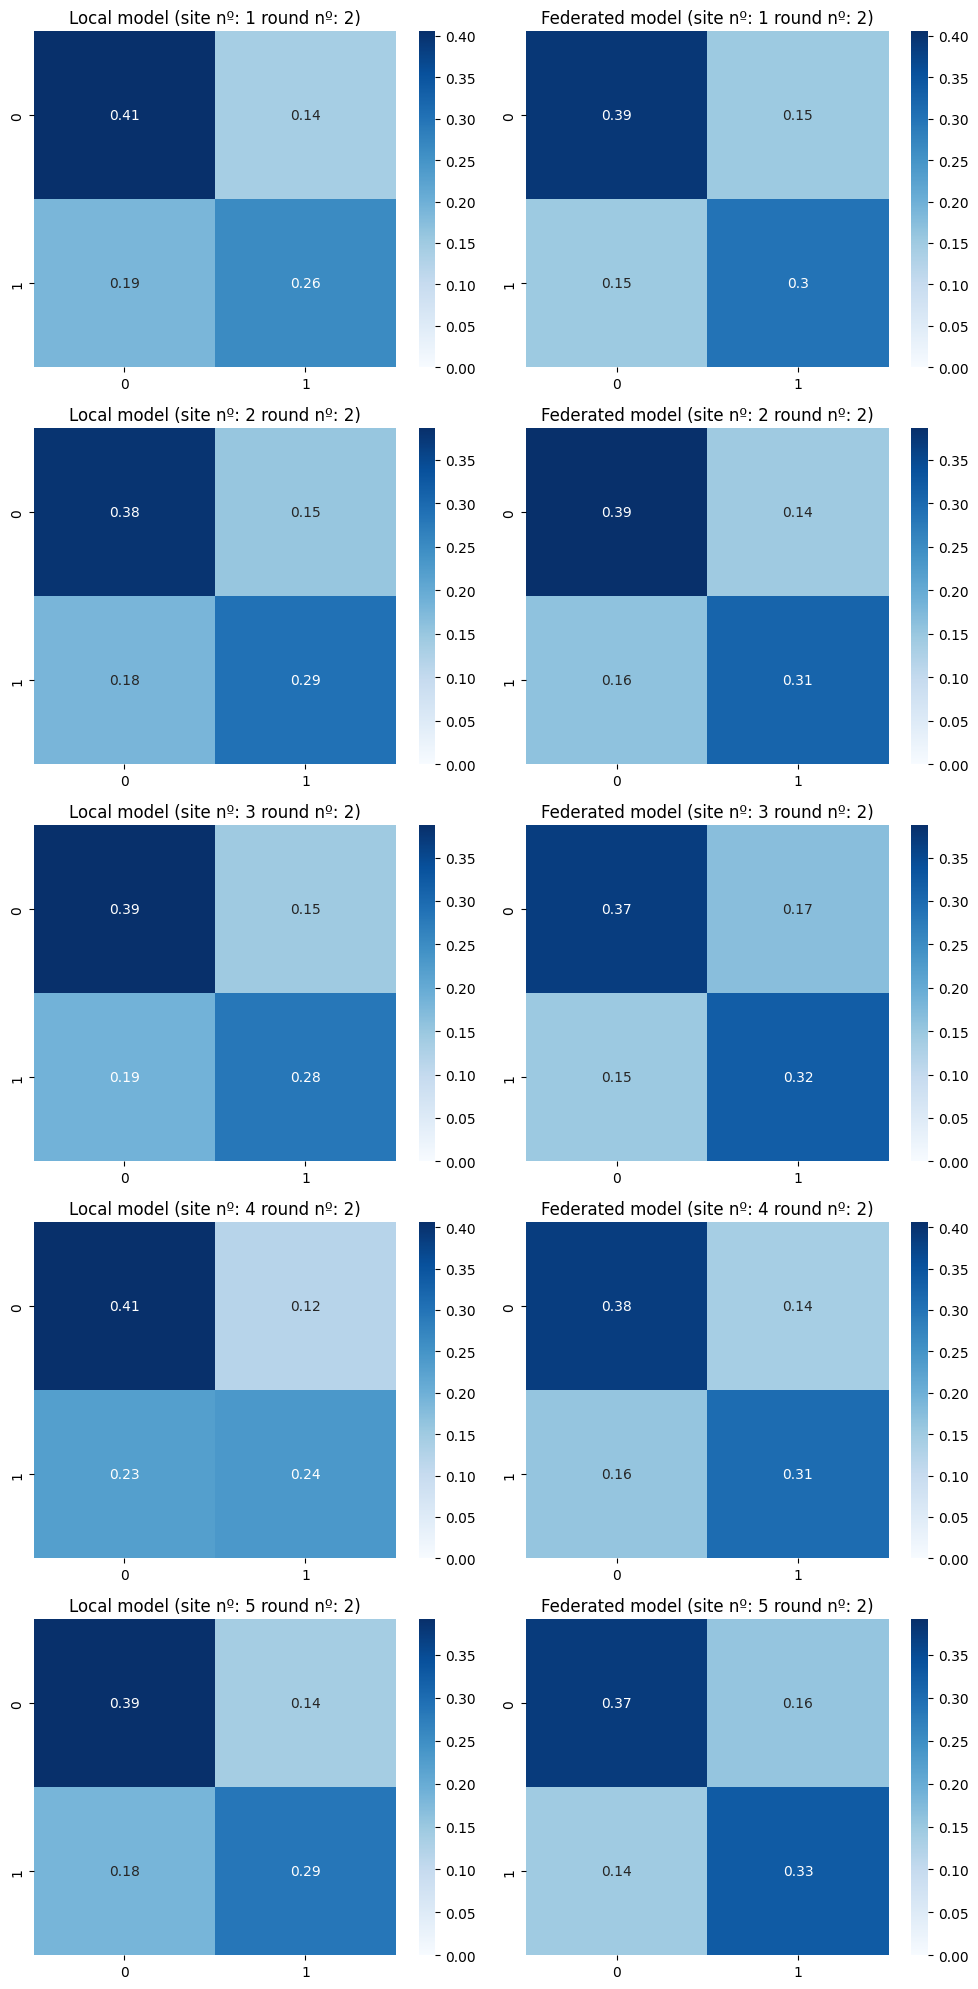

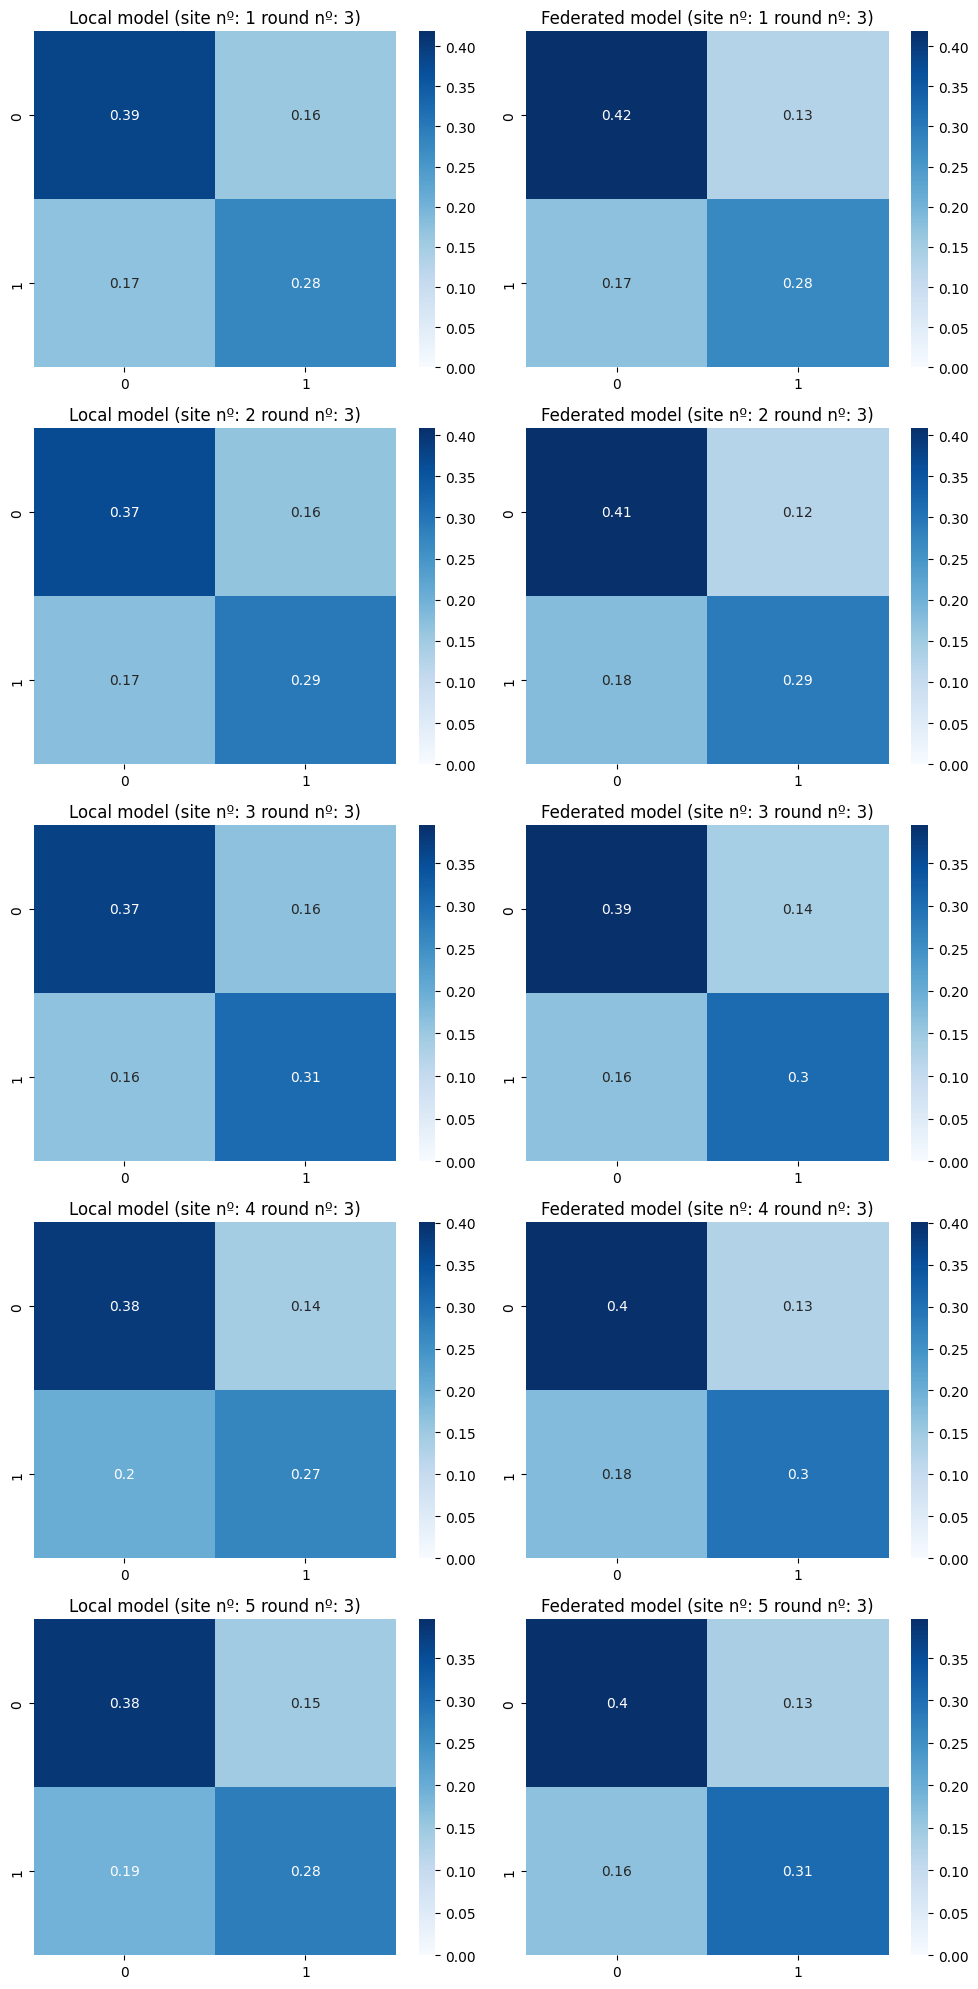

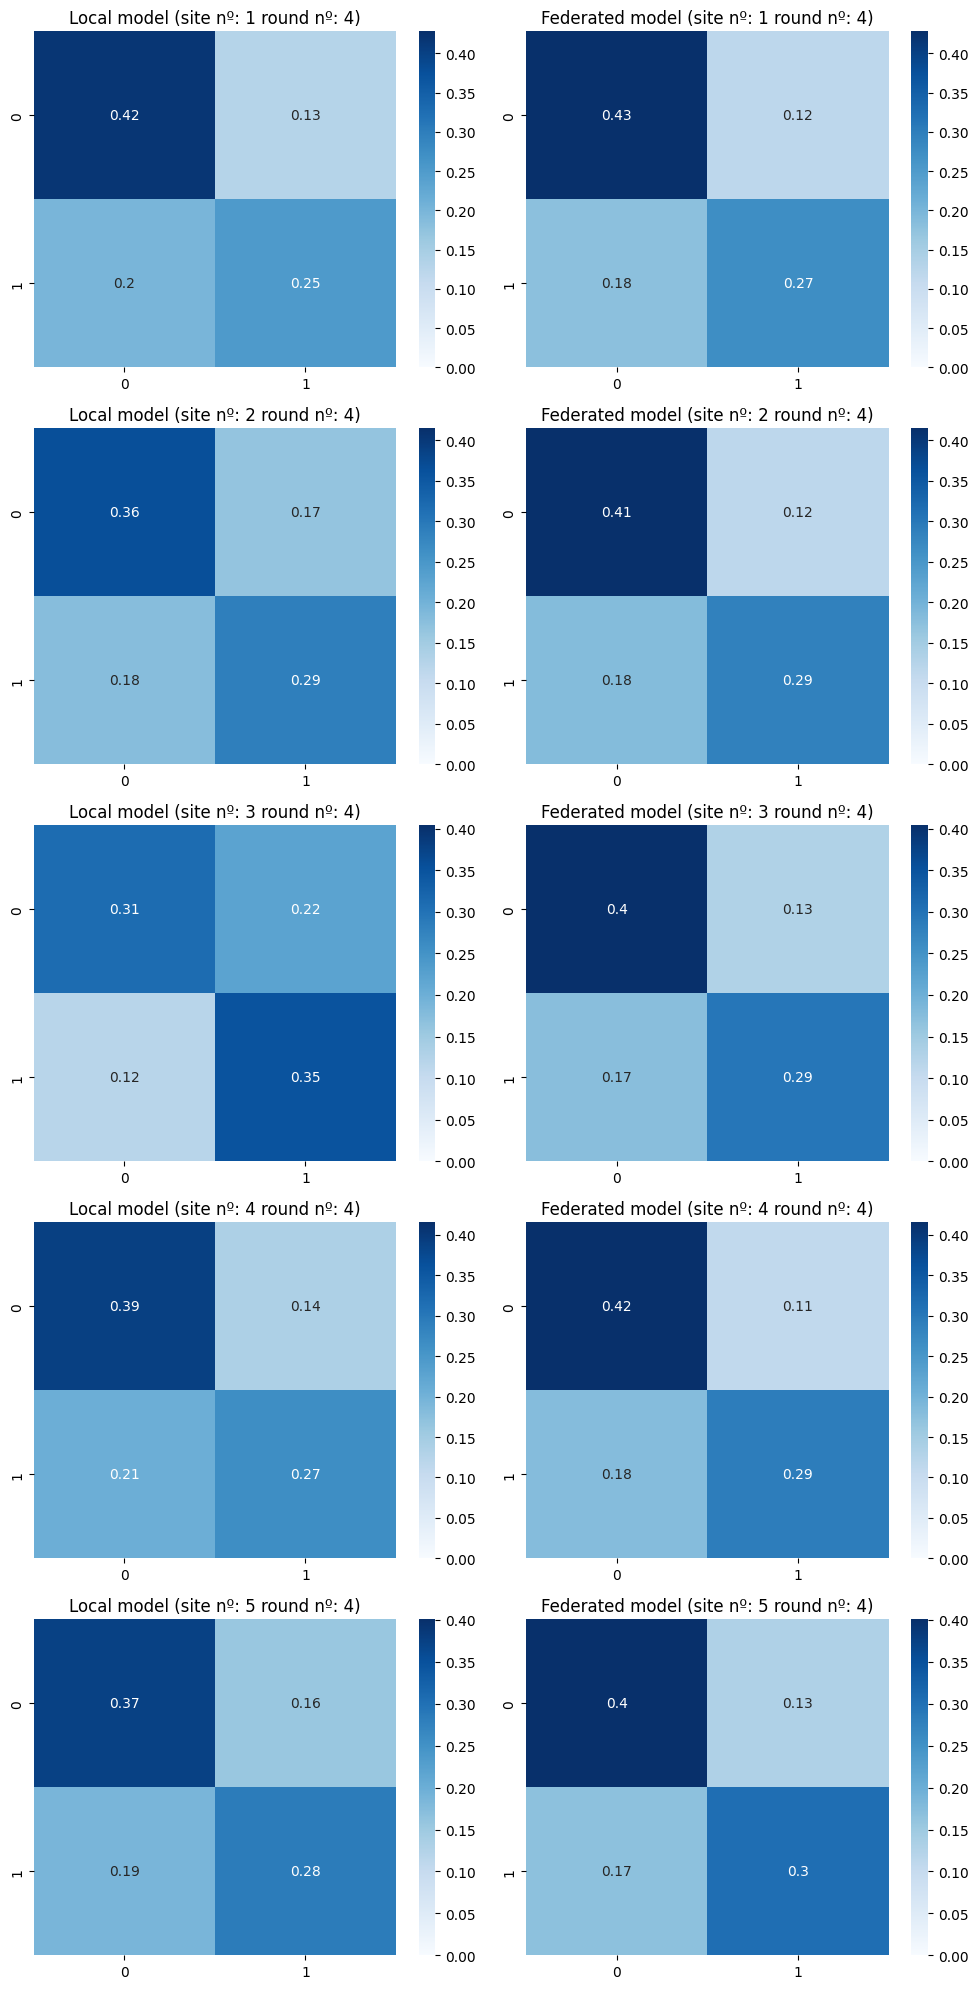

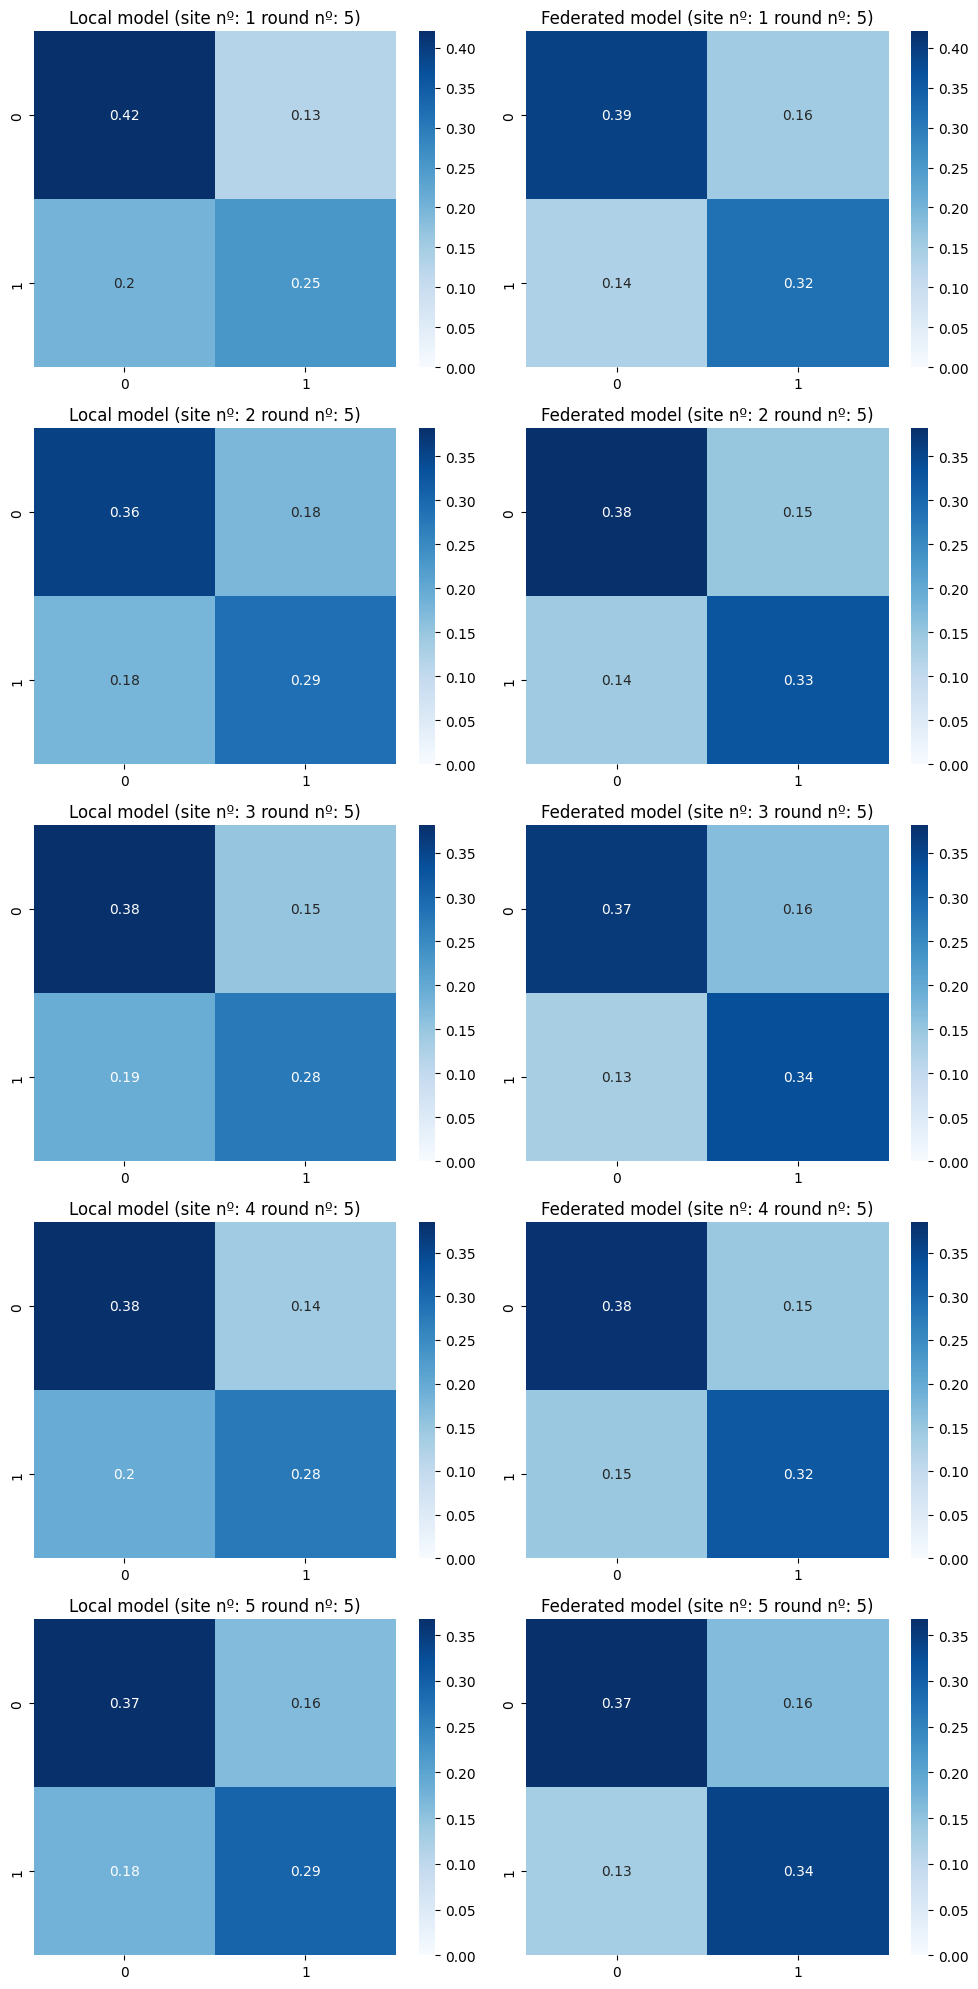

In [11]:
for n in df_metrics_local['round_number'].unique():
    plot_confusion_matrices(df_metrics_local, df_metrics_fed, round_number=n, normalize='all')

In [13]:
def plot_correctness_chart(df_local, df_fed, figsize=None, spread=0.4, transparency=0.1):
    df_local_tmp = df_local.sort_values(by=['site_number', 'round_number'])
    df_fed_tmp = df_fed.sort_values(by=['site_number', 'round_number'])        
    n_sites = df_local['site_number'].unique().shape[0]
    n_rounds = df_fed['round_number'].unique().shape[0]
    if not figsize:
        figsize = (n_sites*4.5, n_rounds*4)
    plt.figure(figsize=figsize)
    for i, (y_true_loc, y_pred_loc,
        y_true_fed, y_pred_fed,
        round_number, site_number) in enumerate(zip(df_local_tmp['y_true'], df_local_tmp['y_pred'],
                                                    df_fed_tmp['y_true'], df_fed_tmp['y_pred'],
                                                    df_local_tmp['round_number'], df_local_tmp['site_number'])):

        x_array = (np.array(y_true_loc) == np.array(y_pred_loc)).astype(int)
        y_array = (np.array(y_true_fed) == np.array(y_pred_fed)).astype(int)
        x_arrays_dict = {'00': [], '01': [], '10': [], '11': []}
        y_arrays_dict = {'00': [], '01': [], '10': [], '11': []}
        for x,y in zip(x_array, y_array):
            if x == 0 and y == 0:
                key = '00'
            elif x == 0 and y == 1:
                key = '01'
            elif x == 1 and y == 0:
                key = '10'
            else:
                key = '11'
            x_arrays_dict[key].append(x)
            y_arrays_dict[key].append(y)

        plt.subplot(n_sites, n_rounds, i+1)
        plt.title(f'Correctness chart (site {site_number} round {round_number})')
        n_samples_max = max([len(val) for val in x_arrays_dict.values()])
        for key_x in x_arrays_dict.keys():
            spread = len(x_arrays_dict[key_x])/n_samples_max
            x_array_corrd = np.array(x_arrays_dict[key_x])
            x_array_corrd = x_array_corrd + 0.95*(np.random.rand(x_array_corrd.shape[0])-0.5) * spread
            y_array_corrd = np.array(y_arrays_dict[key_x])
            y_array_corrd = y_array_corrd + 0.95*(np.random.rand(y_array_corrd.shape[0])-0.5) * spread
            plt.scatter(x_array_corrd, y_array_corrd, alpha=transparency, color='royalblue')
        plt.plot([-1, 2], [0.5, 0.5], color='k', alpha=0.5, linestyle=':')
        plt.plot([0.5, 0.5], [-1, 2], color='k', alpha=0.5, linestyle=':')
        plt.xlim([-0.5, 1.5])
        plt.ylim([-0.5, 1.5])
        if site_number == df_local_tmp['site_number'].max():
            plt.xlabel('Local model')
        if round_number == df_local_tmp['round_number'].min():
            plt.ylabel('Federated model')
        plt.xticks([0,1], ['Wrong', 'Correct'])
        plt.yticks([0,1], ['Wrong', 'Correct'])

    plt.tight_layout()
    plt.show()

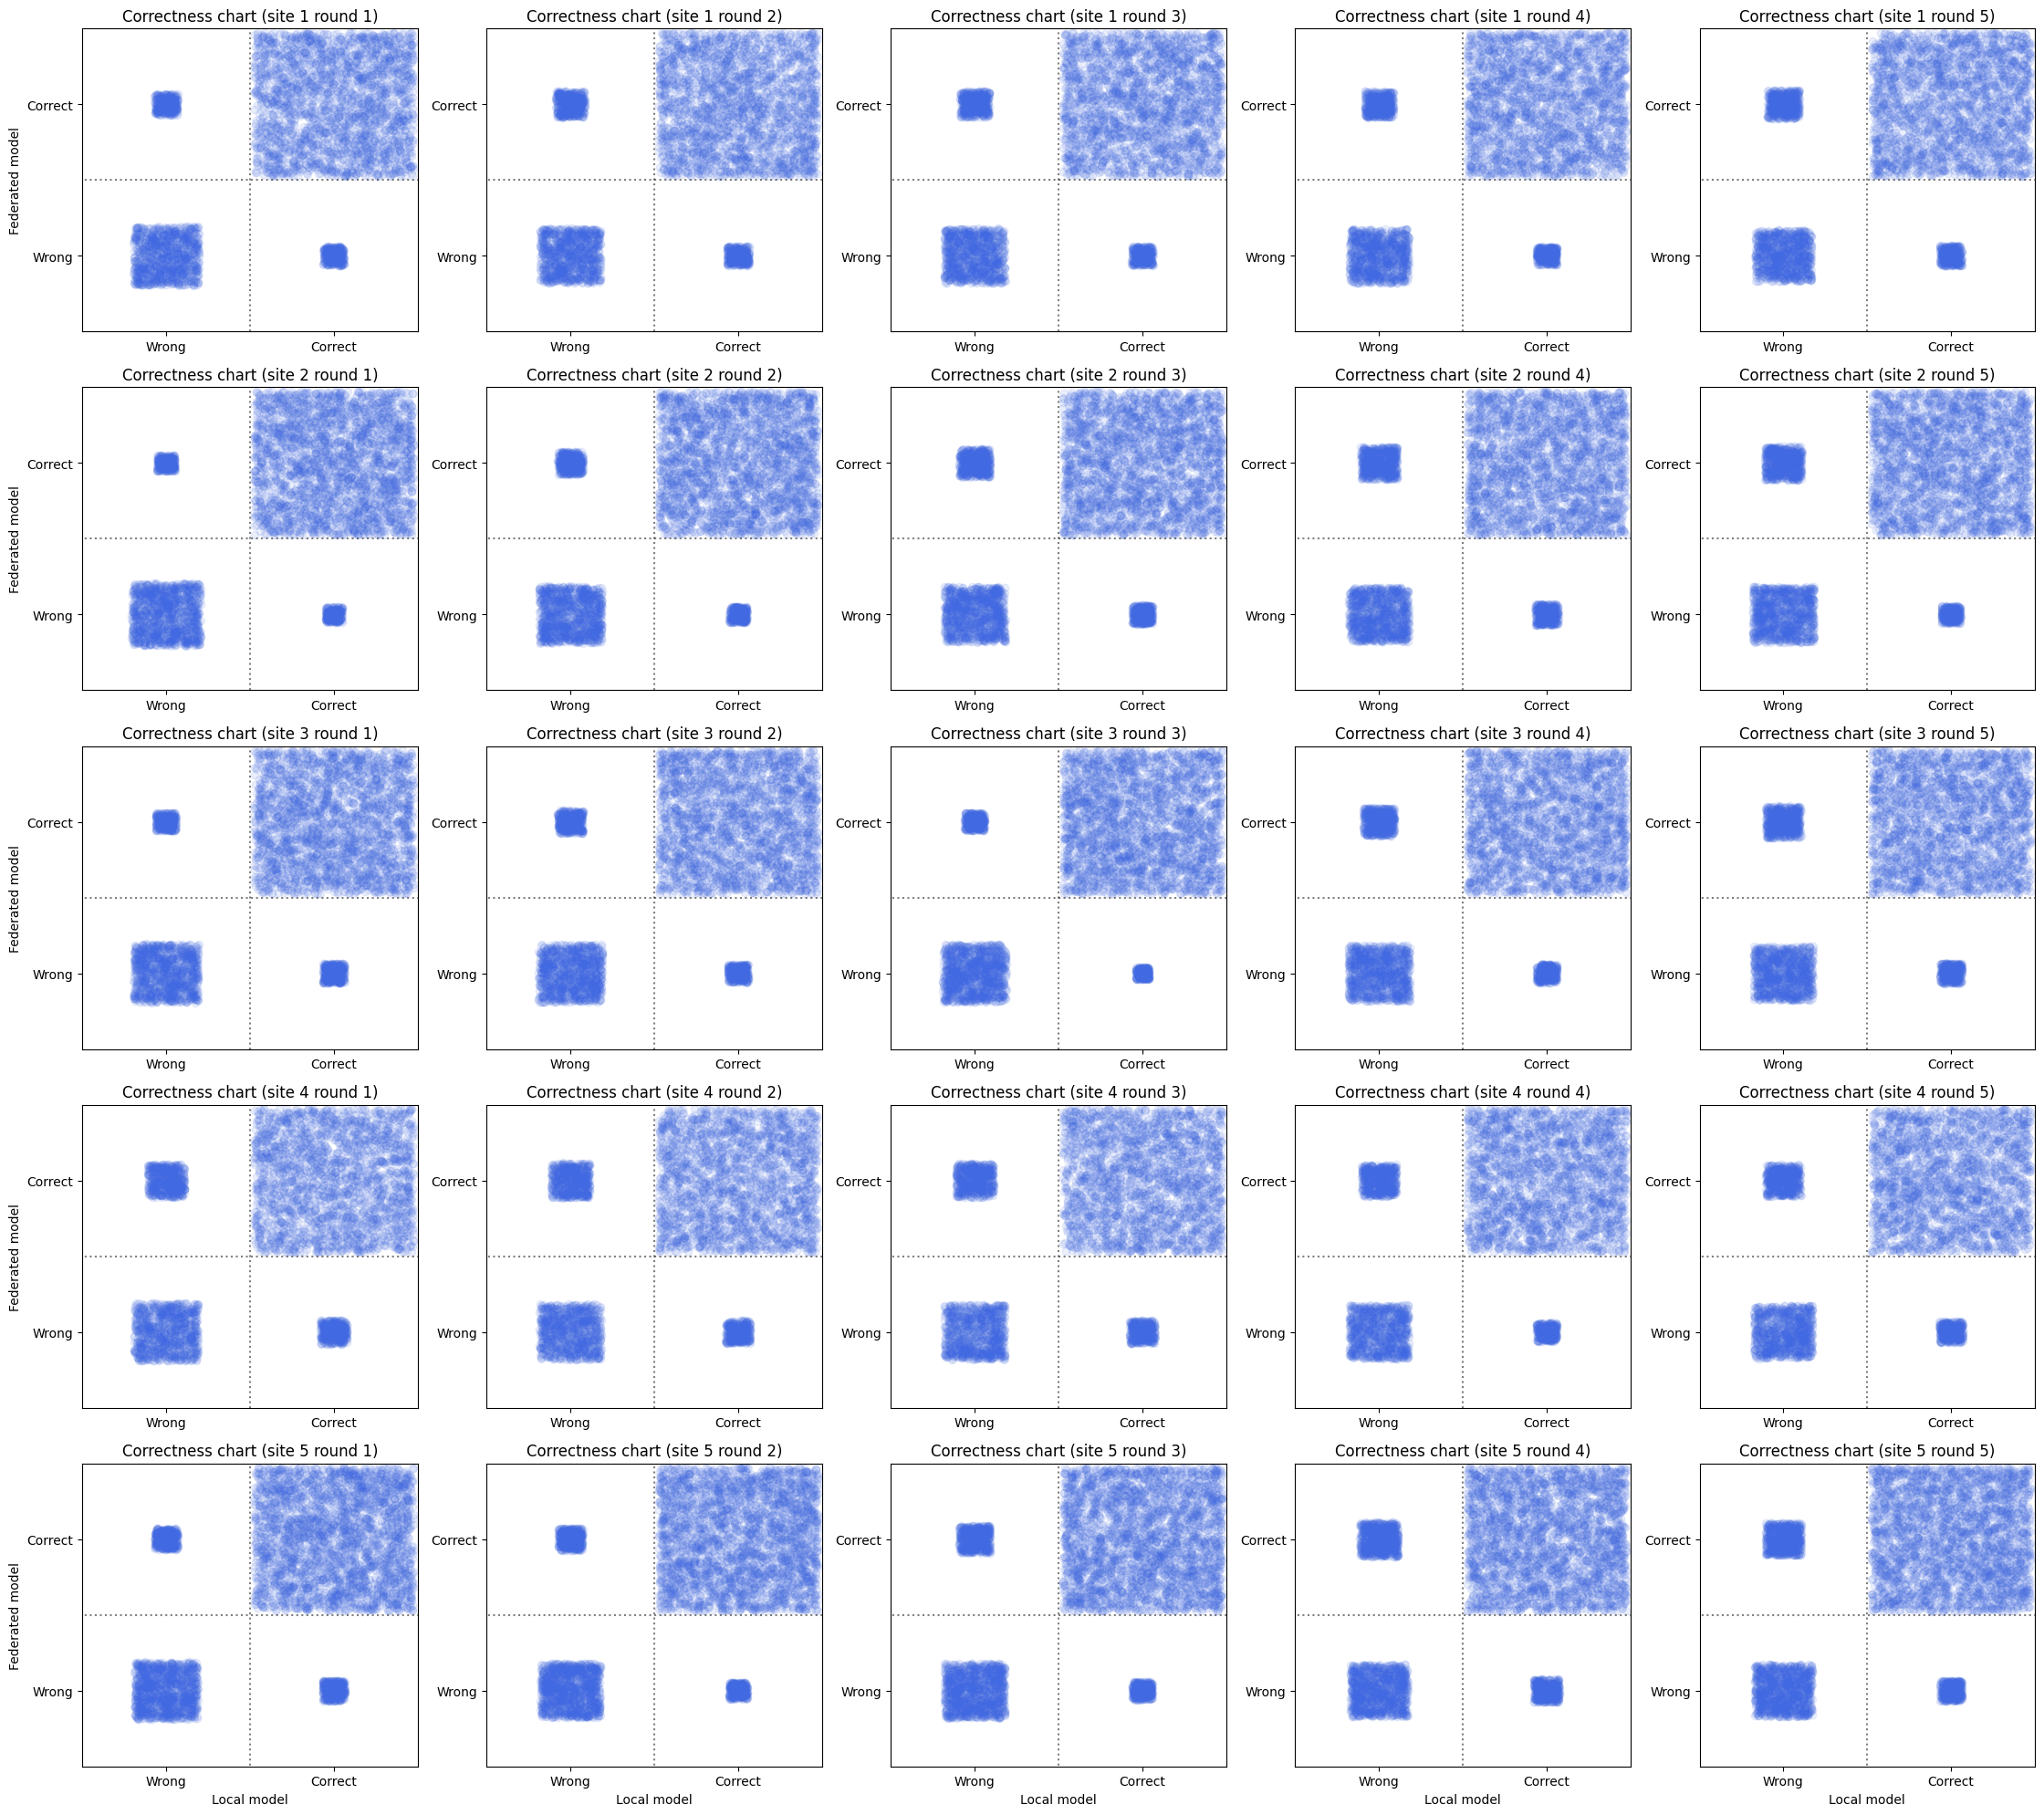

In [14]:
plot_correctness_chart(df_metrics_local, df_metrics_fed)

In [16]:
def plot_correctness_bars(df_local, df_fed, figsize=None, transparency=0.8, normalize=None,):
    df_local_tmp = df_local.sort_values(by=['site_number', 'round_number'])
    df_fed_tmp = df_fed.sort_values(by=['site_number', 'round_number'])
    n_sites = df_local['site_number'].unique().shape[0]
    n_rounds = df_fed['round_number'].unique().shape[0]
    if not figsize:
        figsize = (n_rounds*3.5, n_sites*4)
    
    plt.figure(figsize=figsize)
    for i,site_number in enumerate(df_local['site_number'].unique()):
        df_local_tmp2 = df_local_tmp[df_local_tmp['site_number'] == site_number]
        df_fed_tmp2 = df_fed_tmp[df_fed_tmp['site_number'] == site_number]
        
        plt.subplot(n_sites, 1, i+1)
        plt.title(f'Correctness bars (site {site_number})')
        
        rounds_array = np.arange(df_local_tmp2.shape[0]) + 1
        y_array00 = np.zeros(n_rounds); y_array01 = np.zeros(n_rounds) 
        y_array10 = np.zeros(n_rounds); y_array11 = np.zeros(n_rounds)

        for (y_true_loc, y_pred_loc,
            y_true_fed, y_pred_fed, round_number) in zip(df_local_tmp['y_true'], df_local_tmp['y_pred'],
                                                         df_fed_tmp['y_true'], df_fed_tmp['y_pred'], df_local_tmp['round_number']):

            x_array = (np.array(y_true_loc) == np.array(y_pred_loc)).astype(int)
            y_array = (np.array(y_true_fed) == np.array(y_pred_fed)).astype(int)
            x_arrays_dict = {'00': [], '01': [], '10': [], '11': []}
            y_arrays_dict = {'00': [], '01': [], '10': [], '11': []}
            for x,y in zip(x_array, y_array):
                if x == 0 and y == 0:
                    key = '00'
                    y_array00[round_number-1] += 1
                elif x == 0 and y == 1:
                    key = '01'
                    y_array01[round_number-1] += 1
                elif x == 1 and y == 0:
                    key = '10'
                    y_array10[round_number-1] += 1
                else:
                    key = '11'
                    y_array11[round_number-1] += 1
                x_arrays_dict[key].append(x)
                y_arrays_dict[key].append(y)
        
        if normalize:
            for r in range(n_rounds):
                sum_arrays = sum([y_array00[r], y_array01[r], y_array10[r], y_array11[r]])
                y_array00[r] = y_array00[r]/sum_arrays
                y_array01[r] = y_array01[r]/sum_arrays
                y_array10[r] = y_array10[r]/sum_arrays
                y_array11[r] = y_array11[r]/sum_arrays
        width = 0.15
        plt.bar(rounds_array - 3*width/2, y_array00, width, label='Loc. wrong & Fed. wrong', alpha=transparency)
        plt.bar(rounds_array - width/2, y_array01, width, label='Loc. wrong & Fed. right', alpha=transparency)
        plt.bar(rounds_array + width/2, y_array10, width, label='Loc. right & Fed. wrong', alpha=transparency)
        plt.bar(rounds_array + 3*width/2, y_array11, width, label='Loc. right & Fed. right', alpha=transparency)
        plt.xlabel('round nummber')
        plt.ylabel('correct predictions [%]')
        plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

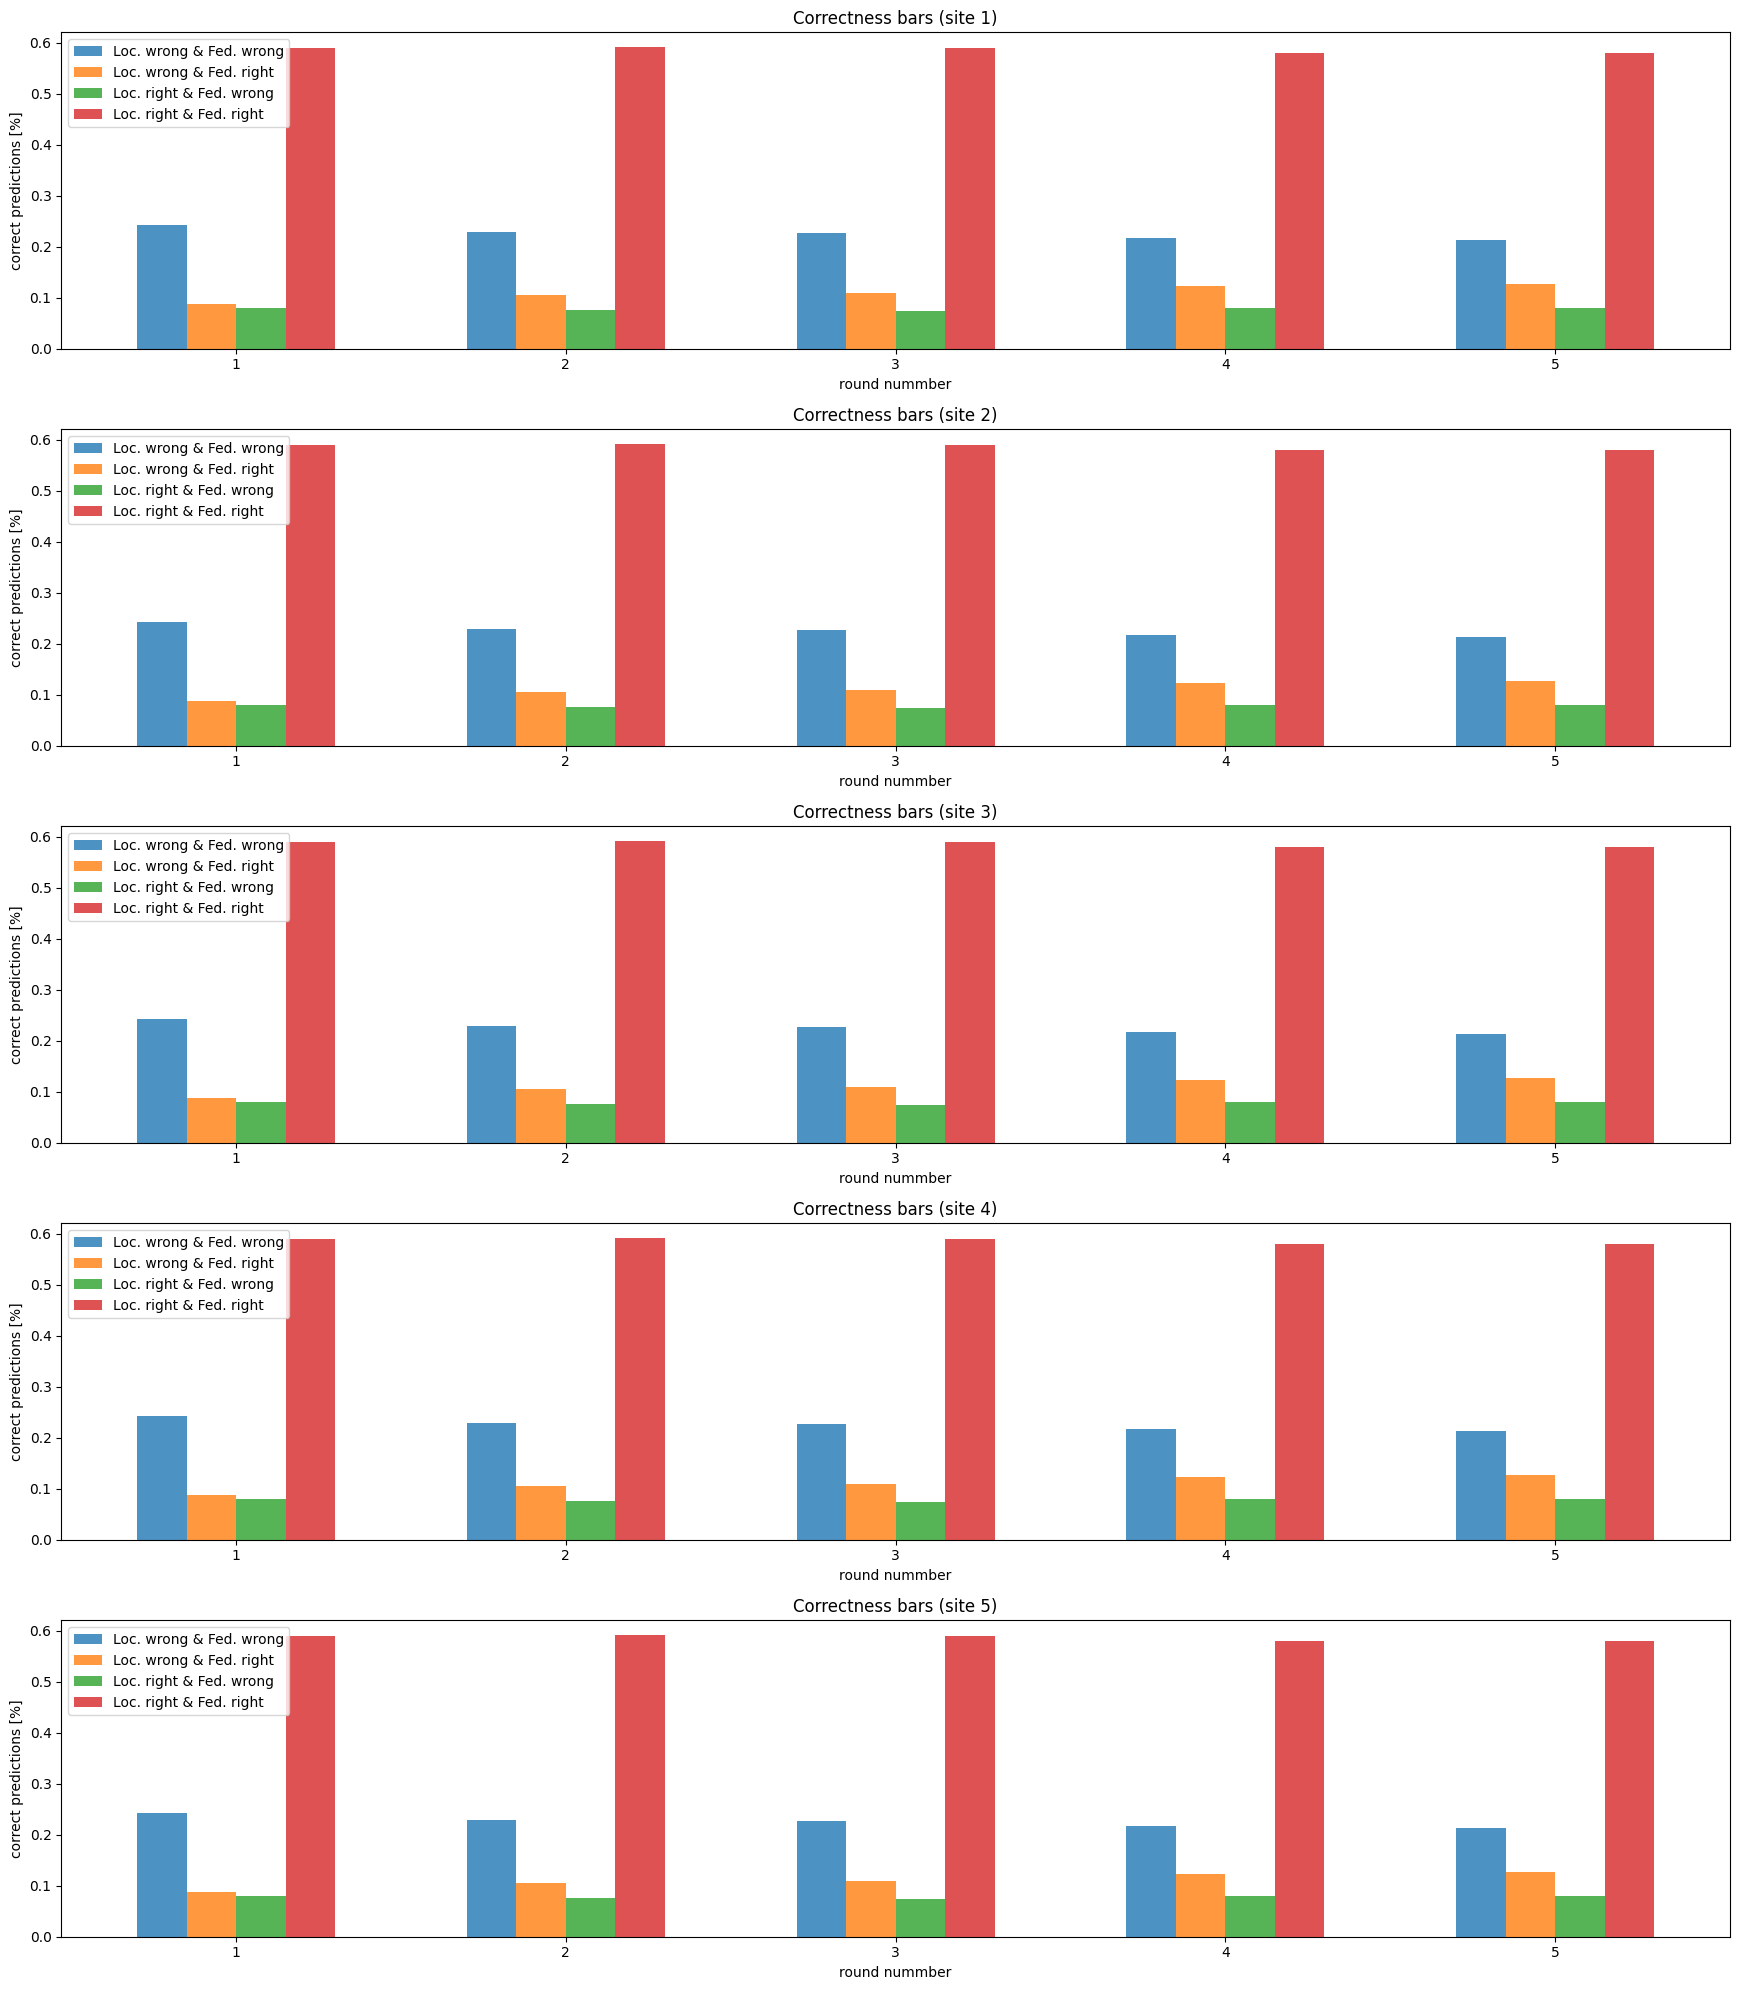

In [17]:
plot_correctness_bars(df_metrics_local, df_metrics_fed, normalize=True)